- Student Name: Scott Louis Andrew Johnson
- Student pace: part-time
- Scheduled project review date/time: 6/25 6:30PM CST
- Instructor Name: Eli Thomas

In [150]:
## Begin by importing all necessary libraries/tools
import numpy as np
import pandas as pd

import pickle

from itertools import combinations

import scipy.stats as stats

from statsmodels.tools.tools import add_constant
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import folium 
from folium import plugins
from folium.plugins import HeatMap

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

KINGS COUNTY HOUSE PRICING PREDICTION

QUESTIONS OF INTEREST:

- Where should we look for houses to sell? Top revenue means looking for the highest value homes?
- What features make houses worth more? What's the waterfront or sunset really worth?
- When should we anticipate selling? Plan to start marketing campaign 1-2 months in advance?


OSEMiN data science workflow
1. obtain(import data)
2. scrub (clean data, deal with missing/awkward values)
3. explore (exploratory data analysis)
4. model (build predictive model)
5. interpret (comment on model and findings)



# OBTAIN

In [2]:
## import data
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [103]:
## get some information about our dataset
df['date'] = pd.to_datetime(df.date)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_post2000,has_basement
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000
mean,4.580474e+09,5.402966e+05,3.371811,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.233181,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.016206,0.38510
std,2.876736e+09,3.673681e+05,0.904096,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.764673,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950,0.126270,0.48663
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.00000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,0.00000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.00000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.00000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.00000


Data set has 21597 values that we need to comb through and decide whether or not they are [Continuous/Categorical], deal with the null values in  [waterfront, view, yr_renovated] and the missing values (?) in [sqft_basement]. Though there may be duplicates, we'll just incorporate those resales as data points a part of our analysis.

# Column Names and descriptions for Kings County Data Set

Classify whether or not each parameter is [Continuous/Categorical]

* **price** -  is prediction target [Continuous]

* **id** - unique identified for a house [Categorical]
* **date** - house was sold [Categorical] --> can classify by month/season/quarter
* **bedroomsNumber** -  of Bedrooms/House [Categorical]
* **bathroomsNumber** -  of bathrooms/bedrooms [Categorical]
* **sqft_livingsquare** -  footage of the home [Continuous]
* **sqft_lotsquare** -  footage of the lot [Continuous]
* **floorsTotal** -  floors (levels) in house [Categorical]
* **waterfront** - House which has a view to a waterfront [Categorical]
* **view** - Has been viewed [Categorical]
* **condition** - How good the condition is ( Overall ) [Continuous/Categorical]
* **grade** - overall grade given to the housing unit, based on King County grading system (1-13) [Categorical]
* **sqft_above** - square footage of house apart from basement [Continuous]
* **sqft_basement** - square footage of the basement [Categorical] --> if basement or not
* **yr_built** - Built Year [Continuous]
* **yr_renovated** - Year when house was renovated [Categorical]--> renovated or not
* **zipcode** - zip --> [Categorical] --> can be used to determine zip code tiers
* **lat** - Latitude coordinate --> [Continuous]
* **long** - Longitude coordinate --> [Continuous/Categorical]
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors [Continuous]
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors [Continuous]

# SCRUB

In [4]:
## Deal with values in sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3500.0        1
4130.0        1
207.0         1
1548.0        1
2300.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [5]:
## Let's replace the ? with 0's as we don't have enough information 
## to suggest the prescence of a basement.
df['sqft_basement'] = df['sqft_basement'].map(lambda x : float(x.replace('?', '0')))
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [6]:
##Next let's examine and decide what to do with the null values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# Describe features with missing values 
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


Since the parameters of interest we're interested in using as categorical variables, we'll just assume the lack of input means they are unaccounted for.  So we'll set them equal to 0. 

In [8]:
## Replace null values with 0s
df = df.fillna(0)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
## Let's see if this significantly impacted the statistics of the aforementioned values.
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,21597.000000,21597.000000,21597.000000
mean,0.006760,0.233181,68.758207
std,0.081944,0.764673,364.037499
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


All good.

# EXPLORE

Let's check out every to see what's interesting about our potential parameters. 


### ID
Likely a variable we'll drop since it probably won't hold contribute anything to price as it's just a way to keep record.

### Bathrooms/Bedrooms/Floors

Looking at these together because I think they'll be correlated later. But for now let's just look at their spread. based on our description table, I have no clue how you'd have 1.75 bathrooms or 1.5 floors. So I'm choosing to round both to whole numbers.

In [10]:
df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))
df['floors'] = df['floors'].map(lambda x: int(round(x,0)))

In [11]:
# Now let's check out bedrooms.
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

One could assume from this distribution that the majority of houses have 5 or fewer rooms. However, what about that seriously crazy house with 33 bedrooms?!

In [12]:
display(df[df['bedrooms'] == 33])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,2,1620,6000,1,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Not very likely that a house with 33 bedrooms would be only 1620 sqft, unless those bedroom were really just cabinets. Probably a typo, so let's fix that and maybe come up with a way to segment the data away from the outliers.

In [13]:
df.loc[15856, 'bedrooms'] = 3

Before we deal with our outliers, let's consider converting the parameters that could be continous to categoricals  or numbers representing booleans that we can easily one-hot encode later: [has_basement, viewed, renovated, yr_built]

In [14]:
df['yr_built'].value_counts(bins=5, normalize=True)

(1992.0, 2015.0]      0.289346
(1946.0, 1969.0]      0.268556
(1969.0, 1992.0]      0.245636
(1923.0, 1946.0]      0.112979
(1899.884, 1923.0]    0.083484
Name: yr_built, dtype: float64

In [15]:
#Define function to categorize year_built into 4 buckets.
def year_built(df):
    ''' Maps yr_built feature into categorical bins'''
    
    # Define bins based on statistics
    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']
    
    # Map to bins using pd.cut()
    df['yr_built'] = pd.cut(df['yr_built'], bins = yr_built_bins, labels = yr_built_labels)
    
    return df

In [16]:
df = year_built(df)

In [17]:
## Relevant renovations for our market likely will have happened in the past 10-15 years. 
## So let's only recognize those.

# Define function to subset of recent renovations
def recently_renovated(df):
    '''Creates bool renovated_post2000 feature and drops original yr_renovated feature'''
    df['renovated_post2000'] = df['yr_renovated'].map(lambda x: 1 if x > 2000 else 0)
    df = df.drop('yr_renovated', axis = 1)
    return df

In [18]:
df = recently_renovated(df)

In [19]:
## Like mentioned earlier, not sure we really care how big the basement is, 
## just if the house has got one, so let's define a function to deal with that.

# Define function has_basement
def has_basement(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [20]:
df = has_basement(df)

Let's see what our distributions look like so far.

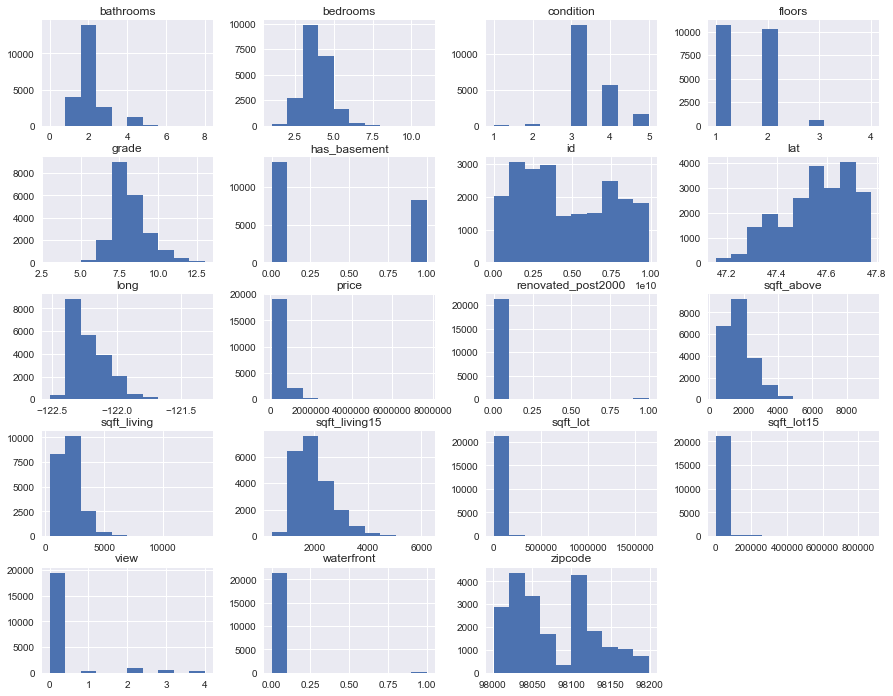

In [21]:
df.hist(figsize = (15,12))
plt.show()

## Dealing with Outliers in general

One clever way is to exclude feature entries that are more than 3 z-scores away from the mean, as our data analysis will better describe the mean values and not the extreme cases. Features that might be good candidates for this include sqft-metrics, bedrooms and bathrooms. 

However what I prefer is to segment the data into an upper and lower portion so that we have an opportunity to feature engineer and fit models to maybe the bottom +95% and the top ~%5. There might be something we can learn about what the majority/minority of the market values at a certain price point.

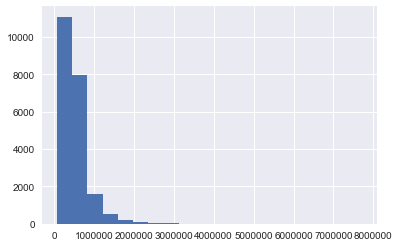

In [22]:
df['price'].hist(bins=20)

In [23]:
## Take a look at the value_counts bins for price.
df['price'].value_counts(bins=25, normalize=True)

(382880.0, 687760.0]      0.415428
(70377.999, 382880.0]     0.372089
(687760.0, 992640.0]      0.141501
(992640.0, 1297520.0]     0.033523
(1297520.0, 1602400.0]    0.017734
(1602400.0, 1907280.0]    0.008612
(1907280.0, 2212160.0]    0.003612
(2212160.0, 2517040.0]    0.003056
(2517040.0, 2821920.0]    0.001343
(2821920.0, 3126800.0]    0.001343
(3126800.0, 3431680.0]    0.000741
(3431680.0, 3736560.0]    0.000324
(3736560.0, 4041440.0]    0.000185
(4346320.0, 4651200.0]    0.000093
(5260960.0, 5565840.0]    0.000093
(6785360.0, 7090240.0]    0.000093
(4041440.0, 4346320.0]    0.000046
(4651200.0, 4956080.0]    0.000046
(4956080.0, 5260960.0]    0.000046
(5565840.0, 5870720.0]    0.000046
(7395120.0, 7700000.0]    0.000046
(7090240.0, 7395120.0]    0.000000
(5870720.0, 6175600.0]    0.000000
(6175600.0, 6480480.0]    0.000000
(6480480.0, 6785360.0]    0.000000
Name: price, dtype: float64

We literally can split this data up into two groups and train models/feature engineer accordingly.

In [55]:
## Use dataframe logic to segment data 
bottom95_df = df[df['price'] < 1297520]
top5_df = df[df['price'] > 1297520]
display(bottom95_df.describe())
display(top5_df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_post2000,has_basement
count,2.078800e+04,2.078800e+04,20788.000000,20788.000000,20788.000000,2.078800e+04,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000,20788.000000
mean,4.597633e+09,4.889525e+05,3.341543,2.009958,2000.716904,1.469066e+04,1.522802,0.002982,0.185492,3.406773,7.563787,1727.592553,98078.454397,47.557866,-122.213359,1939.859438,12490.817539,0.014480,0.375553
std,2.877681e+09,2.264458e+05,0.890045,0.696117,801.310105,4.005710e+04,0.554014,0.054532,0.668615,0.647323,1.067240,746.504380,53.338469,0.140320,0.141955,634.020410,26484.995235,0.119459,0.484277
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.126059e+09,3.170000e+05,3.000000,2.000000,1410.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,98033.000000,47.463100,-122.330000,1470.000000,5060.000000,0.000000,0.000000
50%,3.905040e+09,4.400000e+05,3.000000,2.000000,1870.000000,7.524500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,98065.000000,47.568300,-122.231000,1810.000000,7560.000000,0.000000,0.000000
75%,7.335400e+09,6.150000e+05,4.000000,2.000000,2470.000000,1.040000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,98118.000000,47.679400,-122.123000,2300.000000,9930.000000,0.000000,1.000000
max,9.900000e+09,1.290000e+06,11.000000,8.000000,7480.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,12.000000,7320.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,1.000000,1.000000


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_post2000,has_basement
count,8.090000e+02,8.090000e+02,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,4.139567e+09,1.859629e+06,4.149567,3.339926,4125.844252,25602.709518,1.841780,0.103832,1.458591,3.488257,10.076638,3356.158220,98065.038319,47.617318,-122.230007,3188.184178,19631.067985,0.060569,0.630408
std,2.818446e+09,6.909010e+05,0.915287,1.020532,1287.635150,66659.429179,0.469026,0.305231,1.601694,0.724516,1.183241,1192.000005,56.335604,0.055933,0.102978,840.462495,42279.063023,0.238685,0.482993
min,3.100016e+07,1.300000e+06,2.000000,1.000000,1670.000000,1880.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1340.000000,98004.000000,47.390700,-122.451000,1100.000000,1378.000000,0.000000,0.000000
25%,1.724069e+09,1.420000e+06,4.000000,3.000000,3280.000000,7800.000000,2.000000,0.000000,0.000000,3.000000,9.000000,2460.000000,98006.000000,47.578900,-122.288000,2610.000000,7320.000000,0.000000,0.000000
50%,3.629890e+09,1.650000e+06,4.000000,3.000000,3950.000000,12445.000000,2.000000,0.000000,1.000000,3.000000,10.000000,3180.000000,98040.000000,47.626300,-122.226000,3110.000000,11570.000000,0.000000,1.000000
75%,6.169901e+09,2.000000e+06,5.000000,4.000000,4670.000000,20031.000000,2.000000,0.000000,3.000000,4.000000,11.000000,4060.000000,98112.000000,47.645300,-122.199000,3750.000000,18777.000000,0.000000,1.000000
max,9.831201e+09,7.700000e+06,9.000000,8.000000,13540.000000,920423.000000,4.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.772900,-121.756000,6210.000000,858132.000000,1.000000,1.000000


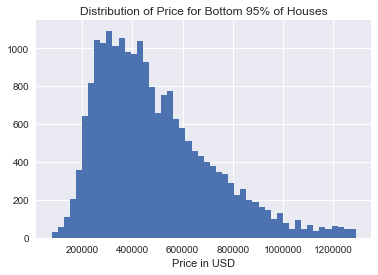

In [53]:
# View price distribution for each segment
bottom95_df['price'].hist(bins=50)
plt.xlabel('Price in USD')
plt.title('Distribution of Price for Bottom 95% of Houses')
plt.show()

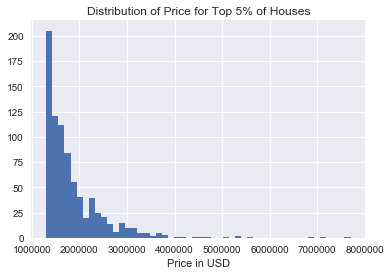

In [54]:
# View price distribution for each segment
top5_df['price'].hist(bins=50)
plt.xlabel('Price in USD')
plt.title('Distribution of Price for Top 5% of Houses')
plt.show()

Now that we have our two segments bottom 95% and top 5%, let's begin to explore some of the questions we're interesting in.

# LOCATION

Let's first take a look at a scatterplot that uses the long/lat to see if we can map both segments too see if there are any hotspots.

In [56]:
#Create copies of top7 and bottom93 df to manipulate
top_df1 = top5_df
bottom_df1 = bottom95_df
all_df = df

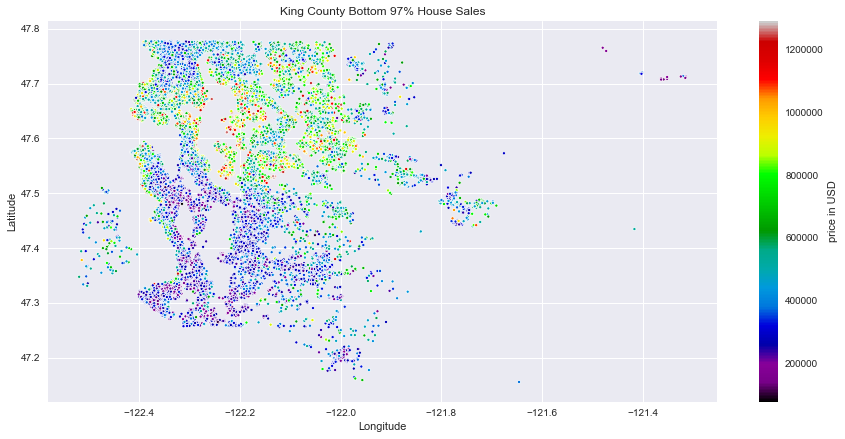

In [57]:
# Plot scatter plot
plt.figure(figsize = (15,7))
ax = sns.scatterplot(x = bottom_df1['long'], y = bottom_df1['lat'], hue = bottom_df1['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = bottom_df1)

norm = plt.Normalize(bottom_df1['price'].min(), bottom_df1['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County Bottom 97% House Sales')
plt.show()

We actually can get an idea from this map that the most valuable houses do tend to be around a certain area, which in this case is marked by the region around lat,long (47.6,-122.2). When we investigate on google maps,that location is right around the waterfront! Further if we investigate our top3%, let's find out where they live.

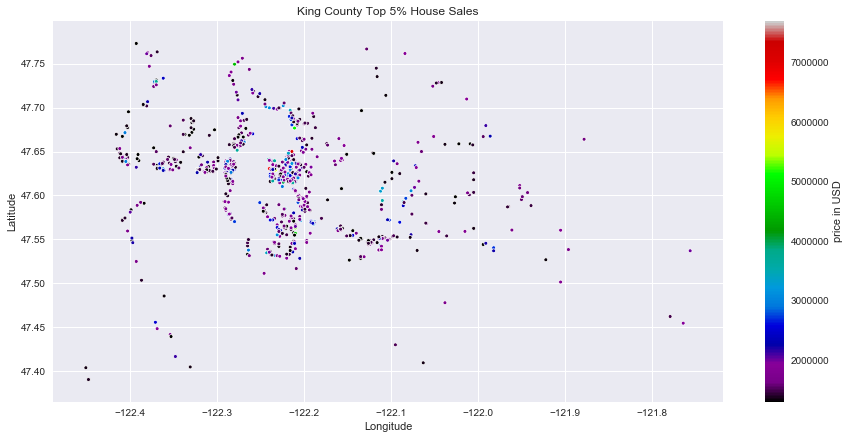

In [62]:
# Plot scatter plot
plt.figure(figsize = (15,7))
ax = sns.scatterplot(x = top5_df['long'], y = top5_df['lat'], hue = top5_df['price'],
                palette = 'nipy_spectral',s=15, legend = None, data = top5_df)

norm = plt.Normalize(top5_df['price'].min(), top5_df['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County Top 5% House Sales')
plt.show()

Though less interesting to look at, the main population is still centered around the region around lat,long (47.6, -122.2).

In [75]:
## Showing percentage of top5% houses purchased in each zipcode
top5_df['zipcode'].value_counts(normalize=True).head(10)

98004    0.174289
98040    0.105068
98112    0.091471
98006    0.074166
98033    0.054388
98039    0.049444
98105    0.043263
98199    0.038319
98119    0.027194
98177    0.023486
Name: zipcode, dtype: float64

In [76]:
##Showing precentage of bottom95% houses purchased in each zipcode
## Certainly seems more uniform in terms of number
bottom95_df['zipcode'].value_counts(normalize=True).head(10)

98103    0.028478
98038    0.028286
98115    0.027420
98052    0.027323
98117    0.026458
98042    0.026313
98034    0.025495
98118    0.024100
98023    0.024004
98133    0.023716
Name: zipcode, dtype: float64

Now if we want a better idea where the most profitable zipcodes to sell in would be, we need to extract the zipcode and price so we can groupby

In [86]:
#Extract price and zipcode
ZP_top5_df = top5_df[['zipcode','price']]
ZP_bottom95_df = bottom95_df[['zipcode','price']]

## Groupby zipcode and take median price
ZP_top5_df = ZP_top5_df.groupby(ZP_top5_df['zipcode']).median()
ZP_bottom95_df = ZP_bottom95_df.groupby(ZP_bottom95_df['zipcode']).median()

display(ZP_top5_df.sort_values(by='price', inplace=False, ascending=False).head(10))
display(ZP_bottom95_df.sort_values(by='price',inplace=False, ascending=False).head(10))

,price
zipcode,
98107,2715000.0
98056,2230000.0
98039,2145000.0
98065,2000000.0
98034,1950000.0
98136,1930000.0
98155,1850000.0
98144,1820000.0
98166,1770000.0


,price
zipcode,
98039,970000.0
98040,885000.0
98004,867500.0
98112,760000.0
98005,754000.0
98075,731000.0
98006,719260.5
98109,707000.0
98119,689007.5


What we learn from this are the top 10 zipcodes to focus on if we want to sell houses that garner the most value for both the major market (95%) and the top echelon of buyers. There are quite a few that are next to each other, as well as common values successful selling within the same zip code of 98004 and 98039.

In [ ]:
# ## If we wanted to plot the top 100 houses most expensive houses in each group
# ## we would extract the top 100 prices from each df and plot them using folium and a heatmap.
## However ultimately what that would mean is using the lat/long and reverse geocoding. NO TIME
# top100_top5_df = top5_df.sort_values('price', ascending = False)[:100]
# top100_bottom95_df = bottom95_df.sort_values('price', ascending = False)[:100]

# FEATURES

What on or in a house increases it's value? Let's examine that by exploring prices' relationship with our categorical features using boxplots.

In [87]:
#Create copies of top7 and bottom93 df to manipulate
top_df2 = top5_df
bottom_df2 = bottom95_df

In [88]:
bottom95_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20788 entries, 0 to 21596
Data columns (total 21 columns):
id                    20788 non-null int64
date                  20788 non-null object
price                 20788 non-null float64
bedrooms              20788 non-null int64
bathrooms             20788 non-null int64
sqft_living           20788 non-null int64
sqft_lot              20788 non-null int64
floors                20788 non-null int64
waterfront            20788 non-null float64
view                  20788 non-null float64
condition             20788 non-null int64
grade                 20788 non-null int64
sqft_above            20788 non-null int64
yr_built              20788 non-null category
zipcode               20788 non-null int64
lat                   20788 non-null float64
long                  20788 non-null float64
sqft_living15         20788 non-null int64
sqft_lot15            20788 non-null int64
renovated_post2000    20788 non-null int64
has_basement     

First we'll explore our bottom 95%.

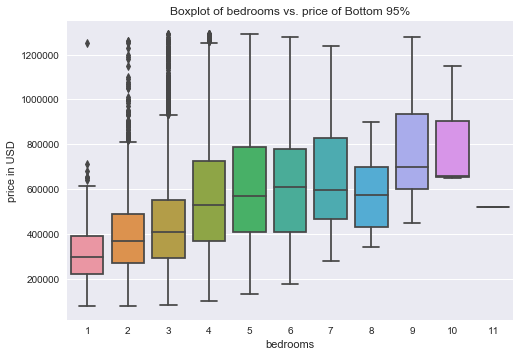

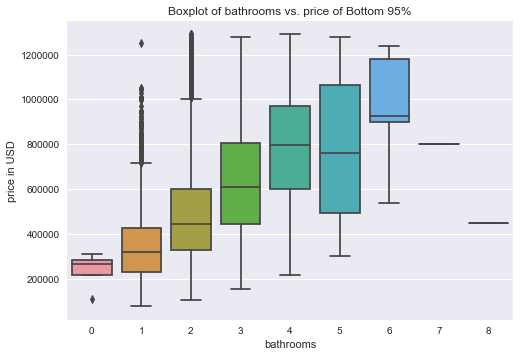

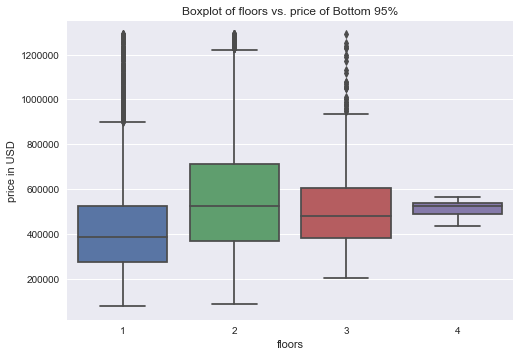

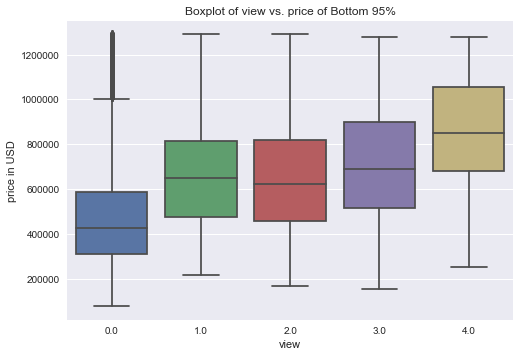

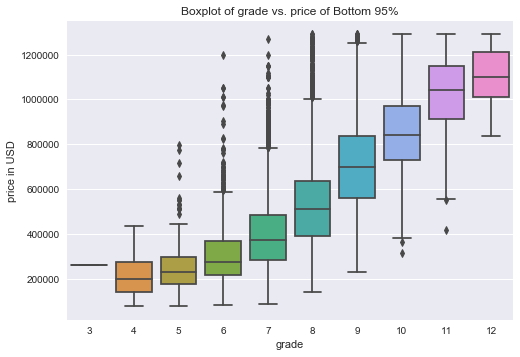

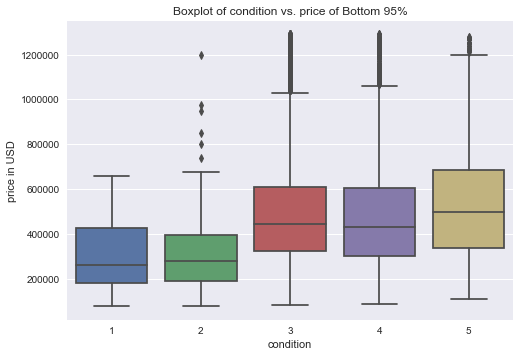

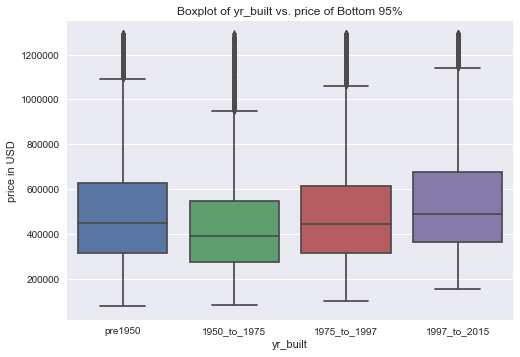

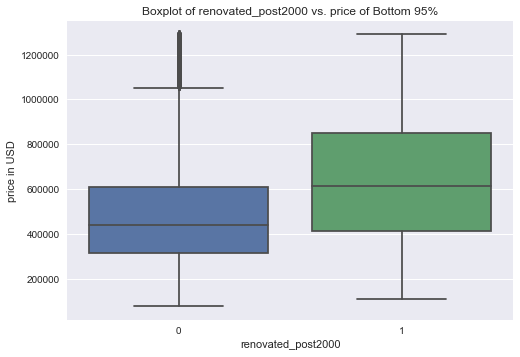

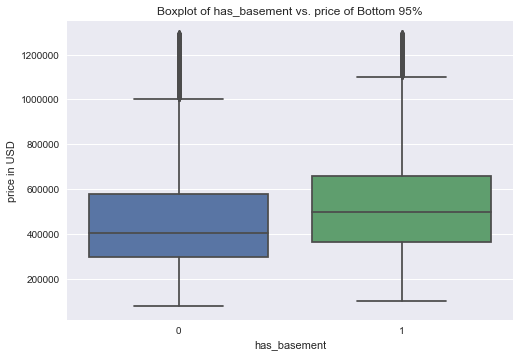

In [92]:
# Define categorical variables
categorical_feats = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition', 
            'yr_built', 'renovated_post2000', 'has_basement']

# Plot boxplots
for feature in categorical_feats:
    sns.boxplot(x = bottom_df2[feature], y = bottom_df2['price'])
    plt.title(f"Boxplot of {feature} vs. price of Bottom 95%")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

- **Bedrooms: Steady increase in median until 6 bedrooms**
- **Bathrooms:Steady increase until 4 bathrooms**
- Floors: no real trend
- Views: slight positive trend
- **Grade: super good indicator** 
- Condition: no significant trend
- year built: no significant correlation
- **Renovated: median price of post2000 renovation is 200k higher**
- **Basement: houses with basement have median price of ~100k higher**

Moving forward my first option to look at will be grade's correlation with when modeling.

Before we move on, when considering bedrooms, we mentioned in our reasoning for making it a categorical variable that the price wouldn't likely always scale with the number of bedrooms because what people were really after when buying a house is livable space. So...given an average amount of livable space, are more bedrooms generally more valuable. Let's find out by exploring houses with living spaces 0.1 std away from the mean.

In [93]:
avgsqftliv_bottom95_df = bottom_df2[abs(bottom_df2['sqft_living']-bottom_df2['sqft_living'].mean()) < 0.1*bottom_df2['sqft_living'].std()]

In [94]:
avgsqftliv_bottom95_df['sqft_living'].describe()

count    1547.000000
mean     2004.508727
std        46.115375
min      1921.000000
25%      1960.000000
50%      2000.000000
75%      2040.000000
max      2080.000000
Name: sqft_living, dtype: float64

For 1547 houses with living space between 1921 and 2080, let's see if bedrooms positively trend with price.

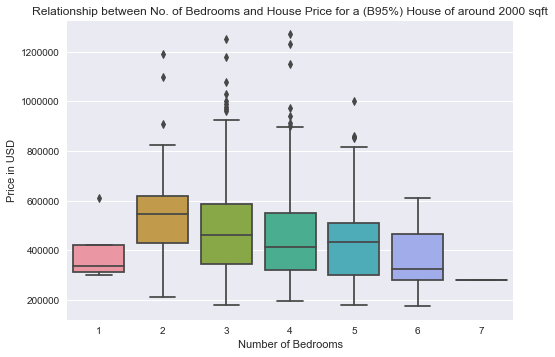

In [96]:
sns.boxplot(x = avgsqftliv_bottom95_df['bedrooms'], y = avgsqftliv_bottom95_df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.title('Relationship between No. of Bedrooms and House Price for a (B95%) House of around 2000 sqft')
plt.show()

Yikes, not at all, in fact you might as well opt for selling a house with less rooms.

Last but not least, though we'd love to assume that living space trends positively with price, let's just plot it for reference. And let's add our new found highly trendy categorical GRADE to get an idea if high quality goes with high sqft.

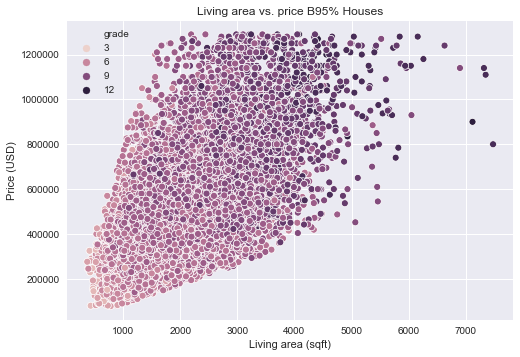

In [97]:
sns.scatterplot(x = bottom_df2['sqft_living'], y = bottom_df2['price'], hue = bottom_df2['grade'], data = bottom_df2)
plt.title('Living area vs. price B95% Houses')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

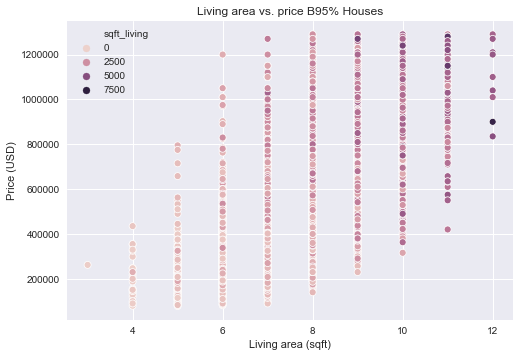

In [112]:
sns.scatterplot(x = bottom_df2['grade'], y = bottom_df2['price'], hue = bottom_df2['sqft_living'], data = bottom_df2)
plt.title('Living area vs. price B95% Houses')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

Seems like lower sqft houses have lower grades hile once you get to about 2500sqft, the quality is generally decently above-average for most houses, with additional variation perhaps coming from other feature variables. And clearly if your house is huge, the quality must be exquisite.

Let's repeat this analysis really quickly for the top 5%:

In [98]:
avgsqftliv_top5_df = top_df2[abs(top_df2['sqft_living']-top_df2['sqft_living'].mean()) < 0.1*top_df2['sqft_living'].std()]

In [99]:
avgsqftliv_top5_df['sqft_living'].describe()

count      78.000000
mean     4126.730769
std        82.469305
min      4010.000000
25%      4052.500000
50%      4120.000000
75%      4207.500000
max      4250.000000
Name: sqft_living, dtype: float64

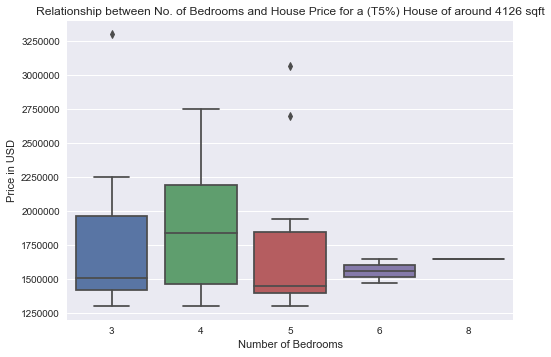

In [100]:
sns.boxplot(x = avgsqftliv_top5_df['bedrooms'], y = avgsqftliv_top5_df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in USD')
plt.title('Relationship between No. of Bedrooms and House Price for a (T5%) House of around 4126 sqft')
plt.show()

No distinct trend here, but seems like 4 bedrooms is the sweet spot for the ultra-rich.

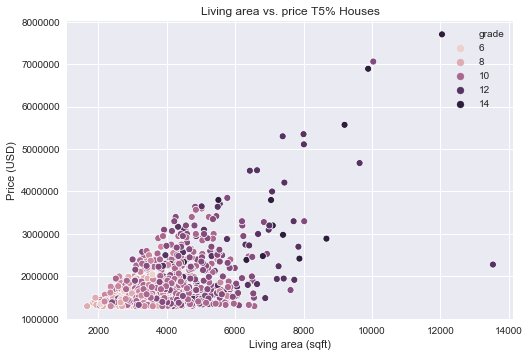

In [101]:
sns.scatterplot(x = top_df2['sqft_living'], y = top_df2['price'], hue = top_df2['grade'], data = top_df2)
plt.title('Living area vs. price T5% Houses')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

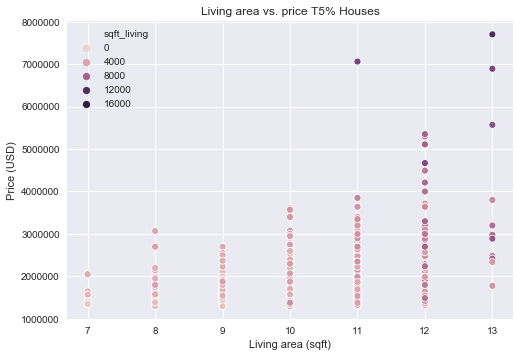

In [109]:
sns.scatterplot(x = top_df2['grade'], y = top_df2['price'], hue = top_df2['sqft_living'], data = top_df2)
plt.title('Living area vs. price T5% Houses')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

Confirmed...don't sell a house below grade 8. Bedrooms 2-6.

# Timing

Having only a year's worth of data, our recommendations for when to sell won't be terribly robust, but we can at least get an idea of what time of most houses sell.

In [102]:
bottom_df2['date'] = pd.to_datetime(bottom_df2.date)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


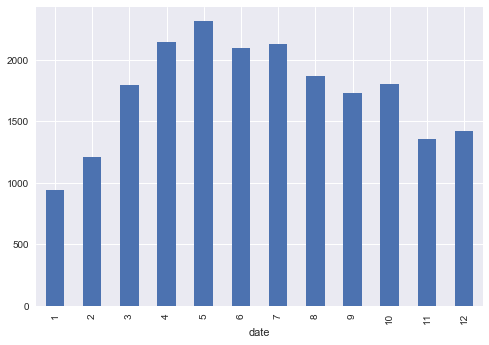

In [105]:
bottom_df2['price'].groupby(bottom_df2["date"].dt.month).count().plot(kind="bar")

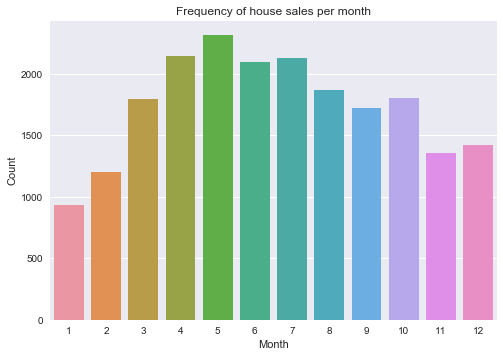

In [106]:
sns.countplot(x = bottom_df2['date'].dt.month, data = bottom_df2)
plt.title('Frequency of house sales per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Oh Q2 in the summer months seems ripe for selling. So let's prep in March/April with plans to sell all through April-July!

# Modeling

The assumptions we need to check to ensure model effectiveness down the road include:
- normality / linearity (use jointplot) of continuous variables, qqplott of residuals to check for nom distribution
- multicollinearity: use heatmap w/ Pearson coefficient [for highly correlated variables --> issues, use one]
- homodescedasticity: check using scatterplot of predictions once you begin to model

#### PREP

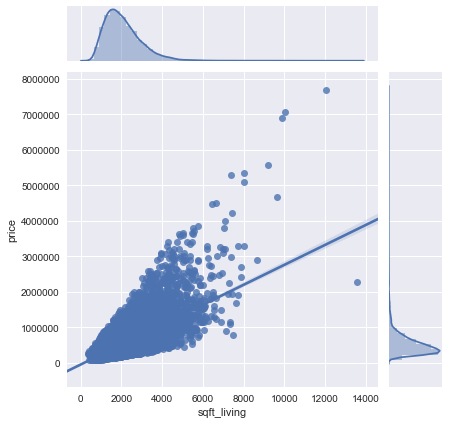

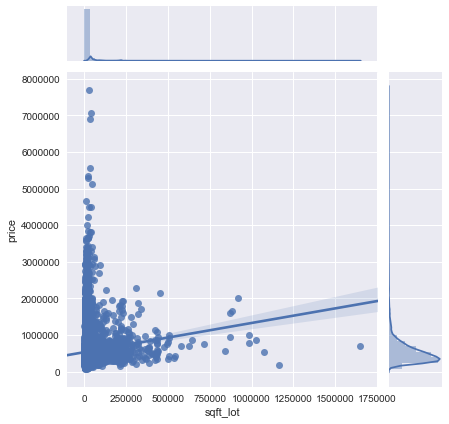

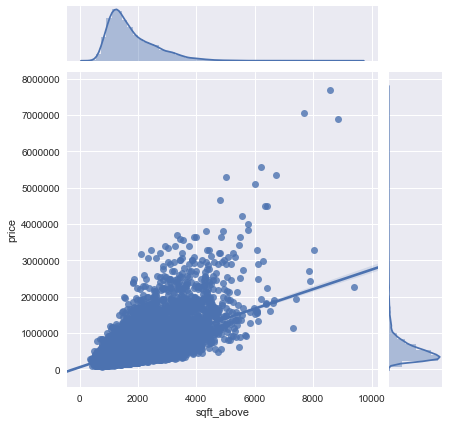

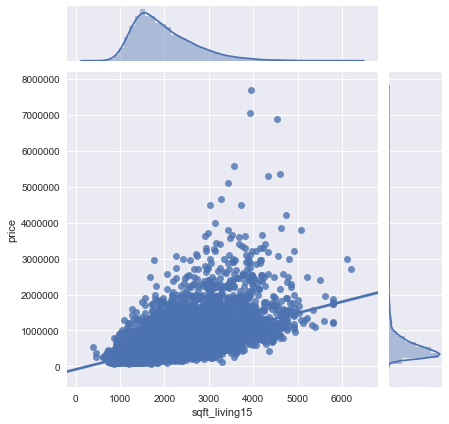

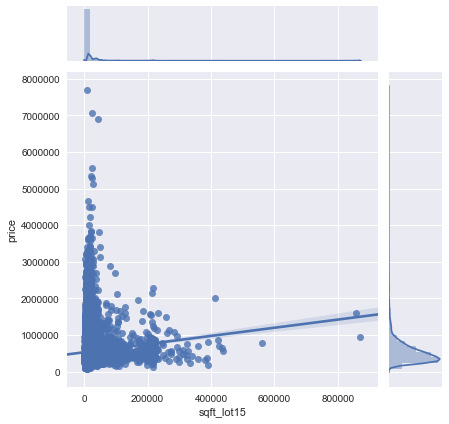

In [107]:
## let's check for linearity of our continuous variables first
# Define list of continuous variables
continuous_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in continuous_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

Seems like neither sqft_lot nor sqft_lot15 do not have a great linear relationship with price. However, sqft_living and sqft_livign15 and sqft_above seem good, but there's probably some relation. If that is the case, it makes sense to only keep one of them to satisfy our multicollinerity assumptions.

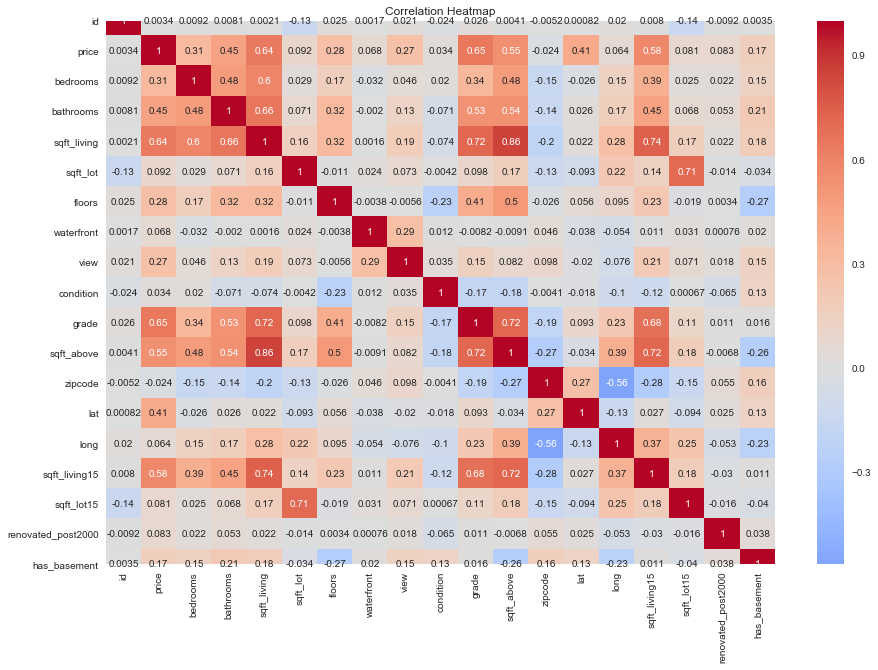

In [113]:
# Correlation matrix
corr = bottom95_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for bottom 95%')
plt.show()

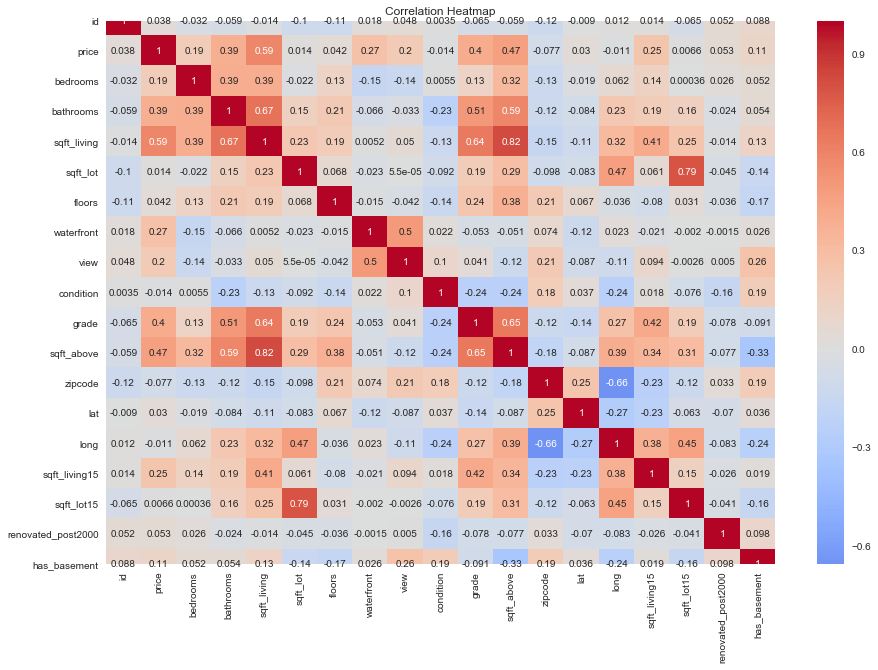

In [114]:
corr = top5_df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for top 5%')
plt.show()

#### Highly correlated stuffs (>=0.7)
- sqft_living, sqft_above
- sqft_living15 & sqft_living
- sqft_living & bathrooms (only for B95)
- sqft_lot & sqft_lot15
- grade & sqft_living (only for B95)

So let's choose some features to drop: sqft_above, bathrooms(b95), sqft_living15, sqft_lot15, grade(b95)

In [115]:
# Drop multicollinear features for each dataset
top5_df = top5_df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
bottom95_df = bottom95_df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15','grade','bathrooms'], axis = 1)

In [116]:
#Save a csv copy
top5_df.to_csv('top5_dfcleaned.csv')
bottom95_df.to_csv('bottom95_dfcleaned.csv')

#### Remove id and date columns, because USELESS

In [118]:
top5_df = top5_df.drop(['id','date'], axis=1)
top5_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,renovated_post2000,has_basement
21,2000000.0,3,3,3050,44867,1,0.0,4.0,3,9,1950_to_1975,98040,47.5316,-122.233,0,1
49,1350000.0,3,2,2753,65005,1,1.0,2.0,5,9,1950_to_1975,98070,47.4041,-122.451,0,1
69,1330000.0,5,2,3200,20158,1,0.0,0.0,3,8,1950_to_1975,98004,47.6303,-122.215,0,1
125,1450000.0,4,3,2750,17789,2,0.0,0.0,3,8,pre1950,98004,47.6141,-122.212,0,1
153,2250000.0,4,3,5180,19850,2,0.0,3.0,3,12,1997_to_2015,98006,47.5620,-122.162,0,1


In [119]:
bottom95_df = bottom95_df.drop(['id','date'], axis=1)
bottom95_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,lat,long,renovated_post2000,has_basement
0,221900.0,3,1180,5650,1,0.0,0.0,3,1950_to_1975,98178,47.5112,-122.257,0,0
1,538000.0,3,2570,7242,2,0.0,0.0,3,1950_to_1975,98125,47.7210,-122.319,0,1
2,180000.0,2,770,10000,1,0.0,0.0,3,pre1950,98028,47.7379,-122.233,0,0
3,604000.0,4,1960,5000,1,0.0,0.0,5,1950_to_1975,98136,47.5208,-122.393,0,1
4,510000.0,3,1680,8080,1,0.0,0.0,3,1975_to_1997,98074,47.6168,-122.045,0,0


## TRAIN-TEST-SPLIT

So let's do two things. 

#### The first is let's train-test split our data into training and testing sets.
 Use train_test_split() function from sklearn. 70%train, 30%test

In [120]:
# Split features X and target y
X_95 = bottom95_df.drop('price', axis = 1)
y_95 = bottom95_df['price']

X_t5 = top5_df.drop('price', axis = 1)
y_t5 = top5_df['price']

In [121]:
# Train-test split bottom95 (30% to test set)
X_train_95, X_test_95, y_train_95, y_test_95 = train_test_split(X_95, y_95, test_size=0.3, random_state=42)

# Train-test split top5 (30% to test set)
X_train_t5, X_test_t5, y_train_t5, y_test_t5 = train_test_split(X_t5, y_t5, test_size=0.3, random_state=42)

In [122]:
# A brief preview of train-test split (bottom95)
print(len(X_train_95), len(X_test_95), len(y_train_95), len(y_test_95))
# A brief preview of train-test split (top5)
print(len(X_train_t5), len(X_test_t5), len(y_train_t5), len(y_test_t5))

14551 6237 14551 6237
566 243 566 243


In [124]:
df_train_95 = pd.concat([X_train_95, y_train_95], axis = 1)
df_train_t5 = pd.concat([X_train_t5, y_train_t5], axis = 1)
display(df_train_95.head())
display(df_train_t5.head())

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,zipcode,lat,long,renovated_post2000,has_basement,price
2708,2,2560,2500,2,0.0,0.0,5,pre1950,98112,47.6233,-122.300,0,1,780000.0
18586,2,1010,9219,1,0.0,0.0,4,1950_to_1975,98033,47.6886,-122.202,0,0,560000.0
9459,4,1770,5000,2,0.0,0.0,3,1997_to_2015,98038,47.3503,-122.005,0,0,291500.0
182,4,2440,9600,2,0.0,0.0,5,1950_to_1975,98034,47.7044,-122.200,0,0,589000.0
16447,3,1010,7384,1,0.0,2.0,5,pre1950,98056,47.4905,-122.191,0,0,254000.0


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,renovated_post2000,has_basement,price
12813,4,2,3910,22710,2,0.0,0.0,3,8,pre1950,98004,47.6295,-122.217,1,0,1750000.0
3857,4,3,3540,11098,2,0.0,0.0,3,10,pre1950,98112,47.6340,-122.288,0,0,2200000.0
19255,4,4,3260,5000,2,0.0,0.0,5,9,pre1950,98105,47.6598,-122.273,0,1,1550000.0
8635,5,4,3420,8000,2,0.0,0.0,3,10,1997_to_2015,98040,47.5736,-122.212,0,0,1440000.0
12700,5,2,4600,23250,2,0.0,2.0,3,9,pre1950,98004,47.6230,-122.218,1,1,2410000.0


## SIMPLE LINEAR REG

#### Next, let's just run a simple linear regression using a feature that seems like a good predictor for both our sets of data (b95,t5).

In [125]:
# Create copy so not to unknowingly change a master
dfsimpLin_95 = df_train_95.copy()
dfsimpLin_t5 = df_train_t5.copy()

In [127]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train_95 = np.array(dfsimpLin_95['sqft_living']).reshape(-1,1)
y_train_95 = dfsimpLin_95['price']

X_train_t5 = np.array(dfsimpLin_t5['sqft_living']).reshape(-1,1)
y_train_t5 = dfsimpLin_t5['price']

In [128]:
# Create model in OLS for bottom 95%
X_int_95 = sm.add_constant(X_train_95)
model_95 = sm.OLS(y_train_95, X_int_95).fit()
summary_95 = model_95.summary()
summary_95

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:02:03   Log-Likelihood:            -1.9627e+05
No. Observations:               14551   AIC:                         3.925e+05
Df Residuals:                   14549   BIC:                         3.925e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.247e+05   3886.180     32.077      0.000    1.17e+05    1.32e+05
x1           182.2250      1.796    101.466      0.000     178.705     185.745
==============================================================================
Omnibus:                     1223.241   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1662.393
Skew:                           0.708   Prob(JB):                         0.00
Kurtosis:                       3.858   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# Create linear regression object for bottom 95%
linreg_95 = LinearRegression()

# Fit on training data
linreg_95.fit(X_train_95, y_train_95)

# Evaluate using rmse
scores_95 = cross_val_score(
            linreg_95, 
            X_train_95,
            y_train_95,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_95 = np.sqrt(-scores_95)
display(rmse_scores_95)
display(rmse_scores_95.mean())
display(rmse_scores_95.std())

array([175645.73565347, 169852.56506491, 176689.56224321, 166147.22288078,
       181394.83038639, 170375.51043886, 169771.67265239, 174176.63981649,
       173412.10856766, 185884.51364051])

174335.0361344669

5612.527945814884

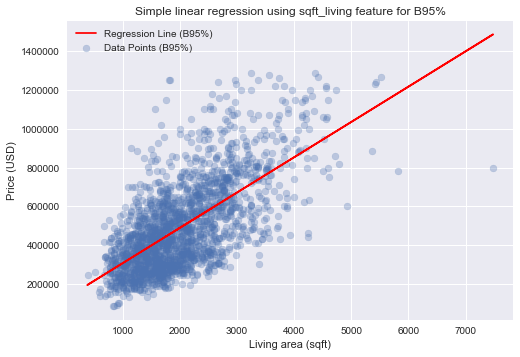

In [133]:
# Create visualisation of simple linear regression for bottom 95%

# Get predictions
y_pred_95 = linreg_95.predict(X_train_95)
# Plot data points
plt.scatter(x = X_train_95[:2000], y = y_train_95[:2000], alpha = 0.3, label = 'Data Points (B95%)')
# Plot regression line
plt.plot(X_train_95, y_pred_95, color = 'red', label = 'Regression Line (B95%)')
plt.legend()
plt.title('Simple linear regression using sqft_living feature for B95%')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [138]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
evaluationtable_95 = pd.DataFrame({'Model for Bottom 95%': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': [],'RMSE sd':[]})

# Add data for simple linear regression
evaluationtable_95.loc[0] = ['Simple Linear Regression', 'Sqft_living', model_95.df_model, round(model_95.rsquared,3)
                          ,round(model_95.rsquared_adj,3), int(rmse_scores_95.mean()), int(rmse_scores_95.std()) ]

# View our evaluation table
evaluationtable_95

,Model for Bottom 95%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Simple Linear Regression,Sqft_living,1.0,0.414,0.414,174335.0,5612.0


In [129]:
# Create model in OLS for top 5%
X_int_t5 = sm.add_constant(X_train_t5)
model_t5 = sm.OLS(y_train_t5, X_int_t5).fit()
summary_t5 = model_t5.summary()
summary_t5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     307.2
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           3.15e-55
Time:                        11:03:38   Log-Likelihood:                -8312.1
No. Observations:                 566   AIC:                         1.663e+04
Df Residuals:                     564   BIC:                         1.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.477e+05      8e+04      6.849      0.000    3.91e+05    7.05e+05
x1           320.8484     18.306     17.527      0.000     284.893     356.804
==============================================================================
Omnibus:                      156.128   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.449
Skew:                           1.181   Prob(JB):                    9.54e-147
Kurtosis:                       7.789   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
# Create linear regression object for top 5%
linreg_t5 = LinearRegression()

# Fit on training data
linreg_t5.fit(X_train_t5, y_train_t5)

# Evaluate using rmse
scores_t5 = cross_val_score(
            linreg_t5, 
            X_train_t5,
            y_train_t5,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_t5 = np.sqrt(-scores_t5)
display(rmse_scores_t5)
display(rmse_scores_t5.mean())
display(rmse_scores_t5.std())

array([496097.95272174, 623728.70772941, 446047.11687374, 656126.69497295,
       701466.2436761 , 468189.26221852, 729930.02789458, 430398.67027032,
       571335.25159275, 649973.1322962 ])

577329.3060246313

104740.46668078742

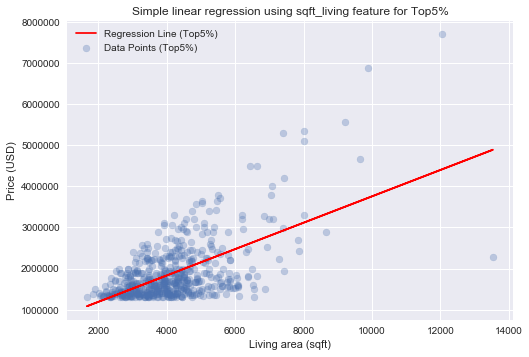

In [134]:
# Create visualisation of simple linear regression for bottom 95%

# Get predictions
y_pred_t5 = linreg_t5.predict(X_train_t5)
# Plot data points
plt.scatter(x = X_train_t5[:2000], y = y_train_t5[:2000], alpha = 0.3, label = 'Data Points (Top5%)')
# Plot regression line
plt.plot(X_train_t5, y_pred_t5, color = 'red', label = 'Regression Line (Top5%)')
plt.legend()
plt.title('Simple linear regression using sqft_living feature for Top5%')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [137]:
# Define table as a dataframe with specific columns. Each column's values will be a list that we will add to.
evaluationtable_t5 = pd.DataFrame({'Model for Top 5%': [], 'Description':[], ' Num Features' : [], 'R-squared':[],
                                'Adj R-squared':[], 'RMSE': [],'RMSE sd':[]})

# Add data for simple linear regression
evaluationtable_t5.loc[0] = ['Simple Linear Regression ', 'Sqft_living', model_t5.df_model, round(model_t5.rsquared,3)
                          ,round(model_t5.rsquared_adj,3), int(rmse_scores_t5.mean()), int(rmse_scores_t5.std()) ]

# View our evaluation table
evaluationtable_t5

,Model for Top 5%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
0,Simple Linear Regression,Sqft_living,1.0,0.353,0.351,577329.0,104740.0


## One hot encoding

Create dummy variables for categorical variables. Define on_hot_encode function:

In [117]:
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

In [139]:
# Select features for one-hot-endcoding
categvars_top5 = ['bedrooms', 'bathrooms', 'floors', 'grade', 'condition','yr_built']
categvars_bottom95 = ['bedrooms', 'floors', 'condition','yr_built']

In [140]:
# create copy of training set
onehot_df_95 = dfsimpLin_95.copy()
onehot_df_t5 = dfsimpLin_t5.copy()

In [141]:
# Apply one-hot encoding
onehot_df_95 = one_hot_encode(dfsimpLin_95, categvars_bottom95)
onehot_df_t5 = one_hot_encode(dfsimpLin_t5, categvars_top5)

In [142]:
# Redefine X_train and y_train without location specific tags
X_train_95 = onehot_df_95.drop(['price', 'lat', 'long', 'zipcode'], axis = 1)
y_train_95 = onehot_df_95['price']

X_train_t5 = onehot_df_t5.drop(['price', 'lat', 'long', 'zipcode'], axis = 1)
y_train_t5 = onehot_df_t5['price']

In [143]:
# Create model in OLS for bottom 95%
X_int_95 = sm.add_constant(X_train_95)
model_95 = sm.OLS(y_train_95, X_int_95).fit()
summary_95 = model_95.summary()
summary_95


/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     560.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:55:53   Log-Likelihood:            -1.9510e+05
No. Observations:               14551   AIC:                         3.903e+05
Df Residuals:                   14524   BIC:                         3.905e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.176e+04   4.05e+04      0.537      0.592   -5.77e+04    1.01e+05
sqft_living             201.2408      2.496     80.628      0.000     196.348     206.133
sqft_lot                 -0.0354      0.035     -1.023      0.306      -0.103       0.032
waterfront             1.623e+05    2.7e+04      6.006      0.000    1.09e+05    2.15e+05
view                   3.968e+04   2177.097     18.227      0.000    3.54e+04    4.39e+04
renovated_post2000     7.319e+04   1.14e+04      6.429      0.000    5.09e+04    9.55e+04
has_basement           2.262e+04   3107.428      7.279      0.000    1.65e+04    2.87e+04
bedrooms_2             7591.9395   1.41e+04      0.538      0.590   -2.01e+04    3.52e+04
bedrooms_3            -3.035e+04    1.4e+04     -2.172      0.030   -5.77e+04   -2960.359
bedrooms_4            -5.322e+04   1.43e+04     -3.715      0.000   -8.13e+04   -2.51e+04
bedrooms_5            -8.437e+04   1.52e+04     -5.537      0.000   -1.14e+05   -5.45e+04
bedrooms_6            -1.362e+05   1.91e+04     -7.110      0.000   -1.74e+05   -9.86e+04
bedrooms_7            -1.934e+05   3.62e+04     -5.341      0.000   -2.64e+05   -1.22e+05
bedrooms_8             -1.82e+05   7.36e+04     -2.472      0.013   -3.26e+05   -3.77e+04
bedrooms_9            -2.345e+05    8.2e+04     -2.858      0.004   -3.95e+05   -7.37e+04
bedrooms_10           -7.384e+04   1.15e+05     -0.642      0.521   -2.99e+05    1.52e+05
bedrooms_11            -2.97e+05   1.62e+05     -1.835      0.067   -6.14e+05    2.03e+04
floors_2               4.921e+04   3729.794     13.194      0.000    4.19e+04    5.65e+04
floors_3               1.663e+05   9026.354     18.428      0.000    1.49e+05    1.84e+05
floors_4               1.248e+05   8.07e+04      1.546      0.122   -3.34e+04    2.83e+05
condition_2            5.494e+04    4.2e+04      1.309      0.191   -2.73e+04    1.37e+05
condition_3            1.199e+05   3.93e+04      3.047      0.002    4.28e+04    1.97e+05
condition_4            1.347e+05   3.94e+04      3.422      0.001    5.75e+04    2.12e+05
condition_5            1.701e+05   3.96e+04      4.300      0.000    9.26e+04    2.48e+05
yr_built_1950_to_1975  -6.89e+04   4190.921    -16.440      0.000   -7.71e+04   -6.07e+04
yr_built_1975_to_1997 -1.024e+05   4303.889    -23.783      0.000   -1.11e+05   -9.39e+04
yr_built_1997_to_2015 -1.047e+05   4915.797    -21.295      0.000   -1.14e+05    -9.5e+04
==============================================================================
Omnibus:                      955.260   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1427.121
Skew:                           0.551   Prob(JB):                    1.27e-310
Kurtosis:                       4.068   Cond. No.                  

Remove features who's p-value is greater than 0.05 with the following code:

In [144]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [145]:
# Get selected features using stepwise selection
selectedfeats_95 = stepwise_selection(X_train_95, y_train_95, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [146]:
# Redefine X_train_95 to only have selected features
X_train_95 = X_train_95[selectedfeats_95]

In [147]:
# Recreate model in OLS for bottom 95%
X_int_95 = sm.add_constant(X_train_95)
model_95 = sm.OLS(y_train_95, X_int_95).fit()
summary_95 = model_95.summary()
summary_95


/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     807.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:59:25   Log-Likelihood:            -1.9512e+05
No. Observations:               14551   AIC:                         3.903e+05
Df Residuals:                   14532   BIC:                         3.904e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.362e+04   1.45e+04      3.008      0.003    1.52e+04     7.2e+04
sqft_living             199.5619      2.429     82.171      0.000     194.802     204.322
view                   4.008e+04   2175.326     18.425      0.000    3.58e+04    4.43e+04
yr_built_1975_to_1997 -1.026e+05   4281.061    -23.961      0.000   -1.11e+05   -9.42e+04
yr_built_1950_to_1975 -6.976e+04   4162.626    -16.758      0.000   -7.79e+04   -6.16e+04
yr_built_1997_to_2015 -1.038e+05   4902.563    -21.167      0.000   -1.13e+05   -9.42e+04
floors_3               1.654e+05   9015.775     18.348      0.000    1.48e+05    1.83e+05
floors_2               4.867e+04   3718.568     13.087      0.000    4.14e+04     5.6e+04
condition_5            1.211e+05   1.48e+04      8.169      0.000    9.21e+04     1.5e+05
bedrooms_2             3.649e+04   4519.535      8.074      0.000    2.76e+04    4.54e+04
has_basement           2.243e+04   3092.637      7.253      0.000    1.64e+04    2.85e+04
bedrooms_4            -2.217e+04   3446.200     -6.434      0.000   -2.89e+04   -1.54e+04
renovated_post2000     7.398e+04   1.14e+04      6.497      0.000    5.17e+04    9.63e+04
waterfront              1.61e+05    2.7e+04      5.960      0.000    1.08e+05    2.14e+05
condition_4            8.581e+04   1.43e+04      6.008      0.000    5.78e+04    1.14e+05
condition_3            7.086e+04   1.42e+04      4.983      0.000     4.3e+04    9.87e+04
bedrooms_6             -1.04e+05    1.3e+04     -8.018      0.000   -1.29e+05   -7.86e+04
bedrooms_7              -1.6e+05   3.33e+04     -4.809      0.000   -2.25e+05   -9.48e+04
bedrooms_5            -5.273e+04   5967.370     -8.836      0.000   -6.44e+04    -4.1e+04
==============================================================================
Omnibus:                      955.450   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.819
Skew:                           0.552   Prob(JB):                    1.80e-309
Kurtosis:                       4.061   Cond. No.                     5.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
# Create linear regression object for bottom 95%
linreg_95 = LinearRegression()

# Fit on training data
linreg_95.fit(X_train_95, y_train_95)

scores_95 = cross_val_score(
            linreg_95, 
            X_train_95,
            y_train_95,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_95 = np.sqrt(-scores_95)
display(rmse_scores_95)
display(rmse_scores_95.mean())
display(rmse_scores_95.std())

array([164201.39627897, 158209.53203107, 163931.95020113, 152228.8576262 ,
       167175.96754104, 160163.27574342, 157001.6142091 , 160495.02139701,
       160512.8535309 , 170177.27486553])

161409.7743424379

4913.555032137073

In [149]:
# Add model to evaluation table for bottom 95%
evaluationtable_95.loc[1] = ['Base Model ', 'One-hot encoding', model_95.df_model, round(model_95.rsquared,3)
                          ,round(model_95.rsquared_adj,3), int(rmse_scores_95.mean()), int(rmse_scores_95.std()) ]

# View our evaluation table
evaluationtable_95.sort_values(by = 'Adj R-squared', ascending=False)

,Model for Bottom 95%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
1,Base Model,One-hot encoding,18.0,0.500,0.499,161409.0,4913.0
0,Simple Linear Regression,Sqft_living,1.0,0.414,0.414,174335.0,5612.0


Now let's do the same thing for the top 5%

In [152]:
# Get selected features using stepwise selection for top 5%
selectedfeats_t5 = stepwise_selection(X_train_t5, y_train_t5, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=False)
# Redefine X_train_95 to only have selected features
X_train_t5 = X_train_t5[selectedfeats_t5]
# Recreate model in OLS for bottom 95%
X_int_t5 = sm.add_constant(X_train_t5)
model_t5 = sm.OLS(y_train_t5, X_int_t5).fit()
summary_t5 = model_t5.summary()
display(summary_t5)
# Create linear regression object for bottom 95%
linreg_t5 = LinearRegression()

# Fit on training data
linreg_t5.fit(X_train_t5, y_train_t5)

scores_t5 = cross_val_score(
            linreg_t5, 
            X_train_t5,
            y_train_t5,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_t5 = np.sqrt(-scores_t5)
display(rmse_scores_t5)
display(rmse_scores_t5.mean())
display(rmse_scores_t5.std())
# Add model to evaluation table for bottom 95%
evaluationtable_t5.loc[1] = ['Base Model ', 'One-hot encoding', model_t5.df_model, round(model_t5.rsquared,3)
                          ,round(model_t5.rsquared_adj,3), int(rmse_scores_t5.mean()), int(rmse_scores_t5.std()) ]

# View our evaluation table
evaluationtable_t5.sort_values(by = 'Adj R-squared', ascending=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     99.82
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           4.28e-85
Time:                        13:15:21   Log-Likelihood:                -8229.1
No. Observations:                 566   AIC:                         1.647e+04
Df Residuals:                     559   BIC:                         1.650e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.766e+05   8.21e+04      9.457      0.000    6.15e+05    9.38e+05
sqft_living   251.0873     19.949     12.586      0.000     211.903     290.272
waterfront   6.768e+05   6.92e+04      9.774      0.000    5.41e+05    8.13e+05
grade_13     7.468e+05   1.67e+05      4.471      0.000    4.19e+05    1.07e+06
sqft_lot       -1.8377      0.344     -5.339      0.000      -2.514      -1.162
bathrooms_8  1.604e+06   3.38e+05      4.744      0.000     9.4e+05    2.27e+06
bathrooms_6  5.537e+05   1.51e+05      3.662      0.000    2.57e+05    8.51e+05
==============================================================================
Omnibus:                       94.761   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.970
Skew:                           0.663   Prob(JB):                     7.09e-94
Kurtosis:                       7.053   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([432516.88488164, 549723.62451607, 508936.3946653 , 630637.40821323,
       660165.12358868, 426475.54781156, 785579.95151633, 404456.88614044,
       470989.72518167, 463045.27208691])

533252.6818601822

117074.91101189496

,Model for Top 5%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
1,Base Model,One-hot encoding,6.0,0.517,0.512,533252.0,117074.0
0,Simple Linear Regression,Sqft_living,1.0,0.353,0.351,577329.0,104740.0


In [153]:
#Save models
tuple_objects_t5 = (linreg_t5, X_train_t5, y_train_t5)
pickle.dump(tuple_objects_t5, open('model_base_t5.pkl','wb'))

tuple_objects_95 = (linreg_95, X_train_95, y_train_95)
pickle.dump(tuple_objects_95, open('model_base_b95.pkl','wb'))

Better model, so use onehot_dfs as base models.

#### Another clever way of introducing features, particularly when including zip codes, is to determine zip code tiers. This may offer a more universal way in the future of classifying certain areas as opposed to just saying "yea that one spot is really good to live". It suggest, spots of a certain characteristics or rankings impact price a certain way. Also there will be less features technically. Let's try it.

In [182]:
## First we have to make these zip code tiers
## Start by creating a copy of our best model dataset: onehot_df
zipTiers_df_95 = onehot_df_95.copy()
zipTiers_df_t5 = onehot_df_t5.copy()

In [183]:
## Group zipcode and take median price like we did earlier
medianP_zipdf_95 = zipTiers_df_95.groupby(zipTiers_df_95['zipcode'])['price'].median().sort_values(ascending = False)
medianP_zipdf_t5 = zipTiers_df_t5.groupby(zipTiers_df_t5['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
medianP_zipdf_95 = medianP_zipdf_95.reset_index()
medianP_zipdf_t5 = medianP_zipdf_t5.reset_index()


# Define dictionary of tiers for bottom 95% [70 zipcodes represented]
tiers_95 = {}
for i in range(0, len(medianP_zipdf_95), 7):
    tiers_95[f'zip_tier_{int((i/7)+1)}'] = list(medianP_zipdf_95['zipcode'])[i:i + 7]
print(tiers_95)

# Define dictionary of tiers for top 5% [45 zipcodes represented]
tiers_t5 = {}
for i in range(0, len(medianP_zipdf_t5), 5):
    tiers_t5[f'zip_tier_{int((i/5)+1)}'] = list(medianP_zipdf_t5['zipcode'])[i:i + 5]
print(tiers_t5)

{'zip_tier_1': [98039, 98004, 98040, 98005, 98112, 98075, 98006], 'zip_tier_2': [98109, 98119, 98102, 98199, 98077, 98033, 98074], 'zip_tier_3': [98105, 98053, 98052, 98029, 98115, 98116, 98122], 'zip_tier_4': [98027, 98103, 98007, 98117, 98008, 98177, 98107], 'zip_tier_5': [98072, 98065, 98136, 98070, 98011, 98034, 98144], 'zip_tier_6': [98024, 98028, 98059, 98125, 98014, 98010, 98019], 'zip_tier_7': [98126, 98045, 98166, 98056, 98133, 98155, 98118], 'zip_tier_8': [98108, 98058, 98038, 98106, 98146, 98092, 98055], 'zip_tier_9': [98042, 98031, 98148, 98030, 98022, 98178, 98023], 'zip_tier_10': [98003, 98188, 98198, 98001, 98032, 98168, 98002]}
{'zip_tier_1': [98107, 98056, 98136, 98034, 98008], 'zip_tier_2': [98119, 98039, 98155, 98166, 98004], 'zip_tier_3': [98112, 98005, 98045, 98144, 98177], 'zip_tier_4': [98027, 98125, 98102, 98122, 98006], 'zip_tier_5': [98053, 98029, 98033, 98040, 98014], 'zip_tier_6': [98024, 98077, 98074, 98072, 98075], 'zip_tier_7': [98105, 98058, 98059, 98116

In [184]:
# Create column with tiers
for key in tiers_95.keys():
    zipTiers_df_95[key] = 0

# reset index before enumerate
zipTiers_df_95 = zipTiers_df_95.reset_index(drop=True)

 # Change value to 1 if zipcode is in tier   
for index, zipcode in enumerate(zipTiers_df_95['zipcode']):
    for key in tiers_95.keys():
        if zipcode in tiers_95[key]:
            zipTiers_df_95.loc[index, key] = 1

In [185]:
#Repeat for top 5%
for key in tiers_t5.keys():
    zipTiers_df_t5[key] = 0

# reset index before enumerate
zipTiers_df_t5 = zipTiers_df_t5.reset_index(drop=True)

 # Change value to 1 if zipcode is in tier   
for index, zipcode in enumerate(zipTiers_df_t5['zipcode']):
    for key in tiers_t5.keys():
        if zipcode in tiers_t5[key]:
            zipTiers_df_t5.loc[index, key] = 1

Now build your model using your zipcode tiers, making sure to drop one tier to not create dependency!

In [186]:
# Define X_train and y_train for bottom 95%
X_train_95 = zipTiers_df_95.drop(['price', 'zipcode', 'lat', 'long', 'zip_tier_10'], axis = 1)
y_train_95 = zipTiers_df_95['price']

#for top 5%
X_train_t5 = zipTiers_df_t5.drop(['price', 'zipcode', 'lat', 'long', 'zip_tier_9'], axis = 1)
y_train_t5 = zipTiers_df_t5['price']

Use stepwise selection to ensure only statistically significant results.

In [187]:
# For bottom 95%
selectedfeats_95 = stepwise_selection(X_train_95, y_train_95, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=False)
X_train_95 = X_train_95[selectedfeats_95]
X_int_95 = sm.add_constant(X_train_95)
model_95 = sm.OLS(y_train_95, X_int_95).fit()
summary_95 = model_95.summary()
print(summary_95)
# Create linear regression object
linreg_95 = LinearRegression()

# Fit on training data
linreg_95.fit(X_train_95, y_train_95)


scores_95 = cross_val_score(
            linreg_95, 
            X_train_95,
            y_train_95,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_95 = np.sqrt(-scores_95)
display(rmse_scores_95)
display(rmse_scores_95.mean())
display(rmse_scores_95.std())
# Add model to evaluation table
evaluationtable_95.loc[2] = ['Model 1', 'With zipcode tiers', model_95.df_model, round(model_95.rsquared,3)
                          ,round(model_95.rsquared_adj,3), int(rmse_scores_95.mean()), int(rmse_scores_95.std()) ]

# View our evaluation table
evaluationtable_95.sort_values(by = 'Adj R-squared', ascending=False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1837.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:15:40   Log-Likelihood:            -1.8935e+05
No. Observations:               14551   AIC:                         3.788e+05
Df Residuals:                   14523   BIC:                         3.790e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.141e+

array([109846.53846207, 103502.21417479, 111148.87428697, 101422.07488554,
       114943.72737928, 106730.73951053, 108075.96348181, 106795.83321588,
       108568.84027572, 116664.46718566])

108769.92728582463

4444.942525236603

,Model for Bottom 95%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
3,Model 2,With interactions,39.0,0.789,0.789,105093.0,4566.0
2,Model 1,With zipcode tiers,27.0,0.774,0.773,108769.0,4444.0
1,Base Model,One-hot encoding,18.0,0.500,0.499,161409.0,4913.0
0,Simple Linear Regression,Sqft_living,1.0,0.414,0.414,174335.0,5612.0


In [188]:
# For top 5%
selectedfeats_t5 = stepwise_selection(X_train_t5, y_train_t5, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=False)
X_train_t5 = X_train_t5[selectedfeats_t5]
X_int_t5 = sm.add_constant(X_train_t5)
model_t5 = sm.OLS(y_train_t5, X_int_t5).fit()
summary_t5 = model_t5.summary()
display(summary_t5)
# Create linear regression object
linreg_t5 = LinearRegression()

# Fit on training data
linreg_t5.fit(X_train_t5, y_train_t5)


scores_t5 = cross_val_score(
            linreg_t5, 
            X_train_t5,
            y_train_t5,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_t5 = np.sqrt(-scores_t5)
display(rmse_scores_t5)
display(rmse_scores_t5.mean())
display(rmse_scores_t5.std())
# Add model to evaluation table
evaluationtable_t5.loc[2] = ['Model 1', 'With zipcode tiers', model_t5.df_model, round(model_t5.rsquared,3)
                          ,round(model_t5.rsquared_adj,3), int(rmse_scores_t5.mean()), int(rmse_scores_t5.std()) ]

# View our evaluation table
evaluationtable_t5.sort_values(by = 'Adj R-squared', ascending=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     81.40
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.47e-95
Time:                        17:15:55   Log-Likelihood:                -8197.3
No. Observations:                 566   AIC:                         1.641e+04
Df Residuals:                     556   BIC:                         1.646e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.041e+05   8.57e+04      5.885      0.000    3.36e+05    6.72e+05
sqft_living   270.2345     19.074     14.168      0.000     232.770     307.699
waterfront   6.365e+05   7.64e+04      8.335      0.000    4.87e+05    7.87e+05
zip_tier_2   3.915e+05   5.03e+04      7.777      0.000    2.93e+05     4.9e+05
grade_13     6.965e+05   1.59e+05      4.382      0.000    3.84e+05    1.01e+06
sqft_lot       -1.6019      0.328     -4.884      0.000      -2.246      -0.958
bathrooms_8   1.34e+06   3.23e+05      4.148      0.000    7.05e+05    1.97e+06
bathrooms_6  4.618e+05   1.44e+05      3.201      0.001    1.78e+05    7.45e+05
view          5.03e+04   1.48e+04      3.392      0.001    2.12e+04    7.94e+04
zip_tier_3   1.906e+05   5.89e+04      3.235      0.001    7.49e+04    3.06e+05
==============================================================================
Omnibus:                       75.527   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.403
Skew:                           0.394   Prob(JB):                     8.58e-97
Kurtosis:                       7.259   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([428963.83180274, 547986.3062603 , 462048.655946  , 586498.58052938,
       612084.94411929, 387882.42155424, 803423.79005265, 401862.94752242,
       417064.04416642, 506286.02999445])

515410.15519478853

121509.0751241524

,Model for Top 5%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
3,Model 2,With interactions,18.0,0.668,0.657,458625.0,83973.0
2,Model 1,With zipcode tiers,9.0,0.569,0.562,515410.0,121509.0
1,Base Model,One-hot encoding,6.0,0.517,0.512,533252.0,117074.0
0,Simple Linear Regression,Sqft_living,1.0,0.353,0.351,577329.0,104740.0


In [189]:
tuple_objects_95 = (linreg_95, X_train_95, y_train_95)
pickle.dump(tuple_objects_95, open('model_1zipt_95.pkl','wb'))
tuple_objects_t5 = (linreg_t5, X_train_t5, y_train_t5)
pickle.dump(tuple_objects_t5, open('model_1zipt_t5.pkl','wb'))

#### Model 2 w/ interacting features

In [165]:
interact_df_95 = zipTiers_df_95.copy()
interact_df_t5 = zipTiers_df_t5.copy()

In [166]:
# Define X_train and y_train
X_train_95 = interact_df_95.drop('price', axis = 1)
y_train_95 = interact_df_95['price']

X_train_t5 = interact_df_t5.drop('price', axis = 1)
y_train_t5 = interact_df_t5['price']

In [167]:
# Define features worth considering for interactions - revert to dfonehot
Features_95 = onehot_df_95.drop(['price', 'lat', 'long', 'zipcode'], axis = 1)
Features_t5 = onehot_df_t5.drop(['price', 'lat', 'long', 'zipcode'], axis = 1)

In [168]:
# Use combinations to get list of column pairs
paircombs_95 = list(combinations(Features_95.columns, 2))
print(len(paircombs_95))
paircombs_t5 = list(combinations(Features_t5.columns, 2))
print(len(paircombs_t5))

325
595


325 pairs for the bottom 95% and 595 for the top5%. Let's find hte top 10 by R^2 for both.

In [169]:
# Create empty dictionary for bottom 95%
interactions_95 = {}


for combo in paircombs_95:
    # Create copy of X_train
    X_interact_95 = X_train_95.copy()
    # Define variables
    var_1_95 = combo[0]
    var_2_95 = combo[1]
    # Add the interacting feature to X_interact
    X_interact_95['var1_inter_var2'] = X_train_95[var_1_95] * X_train_95[var_2_95]
    # Create a cross-validation with 5 folds
    crossvalidation_95 = KFold(n_splits=5, shuffle=True, random_state=1)
    # Compute the mean R^2
    interact_r2_95 = np.mean(cross_val_score(linreg_95, X_interact_95, y_train_95, scoring='r2', cv=crossvalidation_95))
    # Add the result to the dictionary with key: pair and value: R^2 score
    interactions_95[combo] = interact_r2_95

# Print the top 10 intereactions sorted by R^2
top_interactions_95 = sorted(interactions_95.items(), key=lambda item: item[1], reverse = True)
print(top_interactions_95[:10])


##for top 5%
interactions_t5 ={}

for combo in paircombs_t5:
    # Create copy of X_train
    X_interact_t5 = X_train_t5.copy()
    # Define variables
    var_1_t5 = combo[0]
    var_2_t5 = combo[1]
    # Add the interacting feature to X_interact
    X_interact_t5['var1_inter_var2'] = X_train_t5[var_1_t5] * X_train_t5[var_2_t5]
    # Create a cross-validation with 5 folds
    crossvalidation_t5 = KFold(n_splits=5, shuffle=True, random_state=1)
    # Compute the mean R^2
    interact_r2_t5 = np.mean(cross_val_score(linreg_t5, X_interact_t5, y_train_t5, scoring='r2', cv=crossvalidation_t5))
    # Add the result to the dictionary with key: pair and value: R^2 score
    interactions_t5[combo] = interact_r2_t5

# Print the top 10 intereactions sorted by R^2
top_interactions_t5 = sorted(interactions_t5.items(), key=lambda item: item[1], reverse = True)
print(top_interactions_t5[:10])

[(('sqft_living', 'yr_built_1950_to_1975'), 0.7837516006588702), (('sqft_living', 'yr_built_1997_to_2015'), 0.7832633637518389), (('has_basement', 'floors_2'), 0.7830065000679014), (('sqft_lot', 'has_basement'), 0.7829911336585493), (('sqft_living', 'floors_2'), 0.782711533889823), (('sqft_lot', 'condition_3'), 0.78259911450636), (('sqft_living', 'floors_3'), 0.7825602743927325), (('floors_2', 'yr_built_1997_to_2015'), 0.7825230849706997), (('sqft_lot', 'condition_5'), 0.7824423669515178), (('sqft_living', 'condition_4'), 0.782430501522819)]
[(('sqft_lot', 'bedrooms_7'), 0.5894633111052006), (('sqft_living', 'sqft_lot'), 0.5434169856088523), (('bedrooms_6', 'bathrooms_8'), 0.5209599467000825), (('bathrooms_8', 'floors_2'), 0.5209599467000825), (('bathrooms_8', 'grade_13'), 0.5209599467000825), (('sqft_living', 'floors_3'), 0.47600086500855293), (('bedrooms_7', 'floors_2'), 0.47033424852371064), (('sqft_living', 'floors_2'), 0.4644135443672178), (('bedrooms_7', 'bathrooms_8'), 0.4597573

In [170]:
# Add top 10 pairwise interactions for bottom 95%
for pair in top_interactions_95[:10]:
    interact_df_95[f"{pair[0][0]}_x_{pair[0][1]}"] = interact_df_95[pair[0][0]]*interact_df_95[pair[0][1]]
# For top 5%
for pair in top_interactions_t5[:10]:
    interact_df_t5[f"{pair[0][0]}_x_{pair[0][1]}"] = interact_df_t5[pair[0][0]]*interact_df_t5[pair[0][1]]

In [171]:
X_train_95 = interact_df_95.drop('price', axis = 1)
X_train_t5 = interact_df_t5.drop('price', axis = 1)

In [172]:
selectedfeats_95 = stepwise_selection(X_train_95, y_train_95, 
                         initial_list=[], 
                         threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=False)

selectedfeats_t5 = stepwise_selection(X_train_t5, y_train_t5, 
                         initial_list=[], 
                         threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Ensure that individual interacting terms are also in model, regardless of what their p-value thresholds are.

In [173]:
feats_95 = []
feats_t5 = []

for pair in top_interactions_95[:10]:
    feats_95.append(pair[0][0])
    feats_95.append(pair[0][1])

for pair in top_interactions_t5[:10]:
    feats_t5.append(pair[0][0])
    feats_t5.append(pair[0][1])   

# Combine with stepwise selected feats
interactfeats_95 = list(set(selectedfeats_95 + feats_95))
interactfeats_t5 = list(set(selectedfeats_t5 + feats_t5))

In [174]:
# Redefine X_train to only have selected features
X_train_95 = X_train_95[interactfeats_95]
X_train_t5 = X_train_t5[interactfeats_t5]

In [175]:
# Recreate model in OLS for bottom 95%
X_int_95 = sm.add_constant(X_train_95)
model_95 = sm.OLS(y_train_95, X_int_95).fit()
summary_95 = model_95.summary()
display(summary_95)
# Create linear regression object
linreg_95 = LinearRegression()

# Fit on training data
linreg_95.fit(X_train_95, y_train_95)


scores_95 = cross_val_score(
            linreg_95, 
            X_train_95,
            y_train_95,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_95 = np.sqrt(-scores_95)
display(rmse_scores_95)
display(rmse_scores_95.mean())
display(rmse_scores_95.std())
# Add model to evaluation table
evaluationtable_95.loc[3] = ['Model 2', 'With interactions', model_95.df_model, round(model_95.rsquared,3)
                          ,round(model_95.rsquared_adj,3), int(rmse_scores_95.mean()), int(rmse_scores_95.std()) ]

# View our evaluation table
evaluationtable_95.sort_values(by = 'Adj R-squared', ascending=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1395.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:55:34   Log-Likelihood:            -1.8882e+05
No. Observations:               14551   AIC:                         3.777e+05
Df Residuals:                   14511   BIC:                         3.780e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2.444e+07   9.06e+05    -26.987      0.000   -2.62e+07   -2.27e+07
floors_2_x_yr_built_1997_to_2015    -5.741e+04   7556.392     -7.598      0.000   -7.22e+04   -4.26e+04
floors_3                            -1.253e+05   1.88e+04     -6.672      0.000   -1.62e+05   -8.85e+04
yr_built_1997_to_2015               -4184.7617   9491.598     -0.441      0.659   -2.28e+04    1.44e+04
zip_tier_8                          -2.562e+06   9.02e+04    -28.397      0.000   -2.74e+06   -2.39e+06
zip_tier_10                         -2.618e+06   9.05e+04    -28.920      0.000    -2.8e+06   -2.44e+06
sqft_living_x_yr_built_1997_to_2015    16.7367      3.150      5.313      0.000      10.562      22.911
bedrooms_9                          -1.878e+05   5.26e+04     -3.574      0.000   -2.91e+05   -8.48e+04
zip_tier_2                          -2.304e+06   9.09e+04    -25.338      0.000   -2.48e+06   -2.13e+06
zip_tier_3                          -2.334e+06   9.07e+04    -25.727      0.000   -2.51e+06   -2.16e+06
has_basement_x_floors_2              2.274e+04   4251.072      5.350      0.000    1.44e+04    3.11e+04
condition_4                          1.606e+05   2.55e+04      6.293      0.000    1.11e+05    2.11e+05
yr_built_1975_to_1997               -2.833e+04   3181.950     -8.905      0.000   -3.46e+04   -2.21e+04
zip_tier_7                          -2.511e+06   9.09e+04    -27.632      0.000   -2.69e+06   -2.33e+06
has_basement                        -1.575e+04   3022.278     -5.210      0.000   -2.17e+04   -9821.874
view                                 4.521e+04   1424.911     31.728      0.000    4.24e+04     4.8e+04
bedrooms_6                          -5.058e+04   8356.655     -6.053      0.000    -6.7e+04   -3.42e+04
sqft_living_x_yr_built_1950_to_1975   -17.3223      3.298     -5.253      0.000     -23.786     -10.858
sqft_living_x_floors_2                  6.9276      3.219      2.152      0.031       0.619      13.237
sqft_living                           149.7512      2.905     51.553      0.000     144.057     155.445
sqft_lot                                0.2539      0.040      6.341      0.000       0.175       0.332
yr_built_1950_to_1975                3390.6226   6321.915      0.536      0.592   -9001.137    1.58e+04
sqft_living_x_floors_3                 55.2847      9.517      5.809      0.000      36.630      73.939
bedrooms_5                          -2.237e+04   3718.637     -6.015      0.000   -2.97e+04   -1.51e+04
zip_tier_1                           -2.22e+06   9.05e+04    -24.534      0.000    -2.4e+06   -2.04e+06
bedrooms_7                          -1.168e+05   2.17e+04     -5.392      0.000   -1.59e+05   -7.43e+04
sqft_lot_x_has_basement                -0.3512      0.051     -6.95

array([105699.16903517,  99719.56604468, 108130.31564432,  98066.18293799,
       110358.86390416, 102973.16813627, 105354.92091188, 102854.18770046,
       103664.86479579, 114110.26996434])

105093.15090750766

4566.1504369144495

,Model for Bottom 95%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
3,Model 2,With interactions,39.0,0.789,0.789,105093.0,4566.0
2,Model 1,With zipcode tiers,27.0,0.774,0.773,108769.0,4444.0
1,Base Model,One-hot encoding,18.0,0.500,0.499,161409.0,4913.0
0,Simple Linear Regression,Sqft_living,1.0,0.414,0.414,174335.0,5612.0


In [176]:
# Recreate model in OLS for top 5%
X_int_t5 = sm.add_constant(X_train_t5)
model_t5 = sm.OLS(y_train_t5, X_int_t5).fit()
summary_t5 = model_t5.summary()
display(summary_t5)
# Create linear regression object
linreg_t5 = LinearRegression()

# Fit on training data
linreg_t5.fit(X_train_t5, y_train_t5)


scores_t5 = cross_val_score(
            linreg_t5, 
            X_train_t5,
            y_train_t5,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_t5 = np.sqrt(-scores_t5)
display(rmse_scores_t5)
display(rmse_scores_t5.mean())
display(rmse_scores_t5.std())
# Add model to evaluation table
evaluationtable_t5.loc[3] = ['Model 2', 'With interactions', model_t5.df_model, round(model_t5.rsquared,3)
                          ,round(model_t5.rsquared_adj,3), int(rmse_scores_t5.mean()), int(rmse_scores_t5.std()) ]

# View our evaluation table
evaluationtable_t5.sort_values(by = 'Adj R-squared', ascending=False)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     61.24
Date:                Thu, 25 Jun 2020   Prob (F-statistic):          2.90e-118
Time:                        16:58:06   Log-Likelihood:                -8122.8
No. Observations:                 566   AIC:                         1.628e+04
Df Residuals:                     547   BIC:                         1.637e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -3.997e+07   3.94e+07     -1.014      0.311   -1.17e+08    3.75e+07
grade_13                  2.518e+05   1.48e+05      1.706      0.089   -3.82e+04    5.42e+05
floors_3                 -1.235e+04   1.04e+05     -0.119      0.905   -2.16e+05    1.91e+05
zip_tier_2                2.323e+05   5.05e+04      4.604      0.000    1.33e+05    3.31e+05
bedrooms_6_x_bathrooms_8  1.013e+06   1.03e+05      9.809      0.000     8.1e+05    1.22e+06
zip_tier_3                1.666e+05   5.62e+04      2.967      0.003    5.63e+04    2.77e+05
zipcode                  -2975.7543    551.256     -5.398      0.000   -4058.592   -1892.917
view                      4.773e+04   1.37e+04      3.480      0.001    2.08e+04    7.47e+04
bedrooms_6               -1.286e+05   9.34e+04     -1.378      0.169   -3.12e+05    5.48e+04
sqft_living                324.7442     18.803     17.271      0.000     287.809     361.680
bathrooms_8               -1.46e+05   1.57e+05     -0.931      0.352   -4.54e+05    1.62e+05
sqft_lot                     0.0515      0.339      0.152      0.879      -0.614       0.716
bedrooms_7_x_floors_3    -1.159e+06   1.85e+05     -6.252      0.000   -1.52e+06   -7.95e+05
bedrooms_7                3.837e+05   2.13e+05      1.800      0.072    -3.5e+04    8.02e+05
bedrooms_7_x_bathrooms_8 -1.159e+06   1.85e+05     -6.252      0.000   -1.52e+06   -7.95e+05
waterfront                6.862e+05   6.82e+04     10.062      0.000    5.52e+05     8.2e+05
long                     -2.356e+06   3.06e+05     -7.695      0.000   -2.96e+06   -1.75e+06
bathrooms_8_x_grade_13    1.013e+06   1.03e+05      9.809      0.000     8.1e+05    1.22e+06
bathrooms_6               4.104e+05   1.29e+05      3.191      0.002    1.58e+05    6.63e+05
bathrooms_8_x_floors_2    1.013e+06   1.03e+05      9.809      0.000     8.1e+05    1.22e+06
zip_tier_9               -3.055e+05   1.38e+05     -2.213      0.027   -5.77e+05   -3.43e+04
floors_2                   5.42e+04    4.9e+04      1.107      0.269    -4.2e+04     1.5e+05
lat                       9.249e+05   3.54e+05      2.612      0.009    2.29e+05    1.62e+06
==============================================================================
Omnibus:                       57.967   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.566
Skew:                           0.620   Prob(JB):                     5.94e-25
Kurtosis:                       4.787   Cond. No.                     1.87e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-34. This might indicate that there are
strong multi

array([420901.55934977, 522881.28648718, 420474.92287011, 493822.1352707 ,
       591954.58346908, 385153.95088066, 584557.68898651, 425187.04107894,
       428281.91069086, 313035.36676906])

458625.0445852859

83973.30025426549

,Model for Top 5%,Description,Num Features,R-squared,Adj R-squared,RMSE,RMSE sd
3,Model 2,With interactions,18.0,0.668,0.657,458625.0,83973.0
2,Model 1,With zipcode tiers,9.0,0.569,0.562,515410.0,121509.0
1,Base Model,One-hot encoding,6.0,0.517,0.512,533252.0,117074.0
0,Simple Linear Regression,Sqft_living,1.0,0.353,0.351,577329.0,104740.0


In [177]:
tuple_objects_95 = (linreg_95, X_train_95, y_train_95)
pickle.dump(tuple_objects_95, open('model_2inter_95.pkl','wb'))
tuple_objects_t5 = (linreg_t5, X_train_t5, y_train_t5)
pickle.dump(tuple_objects_t5, open('model_2inter_t5.pkl','wb'))

#### Let's try the RFE Model Really Quickly:

Recursive Feature Selection used to optimally see if we can reduce the number of features without sacrificing performance

In [178]:
# Define X_train and y_train
X_train_95 = zipTiers_df_95.drop(['price', 'zipcode', 'lat', 'long', 'zip_tier_10'], axis = 1)
y_train_95 = zipTiers_df_95['price']

X_train_t5 = zipTiers_df_t5.drop(['price', 'zipcode', 'lat', 'long', 'zip_tier_9'], axis = 1)
y_train_t5 = zipTiers_df_t5['price']

In [179]:
# Define function to plot adjusted R^2 for increasing number of features using RFE
def RFEplot(X_train, y_train):
    # Create list to add adjusted R^2 values
    adj_r2_list = []
    
    for i in range(len(X_train.columns)):    
        # initialize linear regression object
        linreg = LinearRegression() 
        # USE RFE
        selector = RFE(linreg, n_features_to_select=(i+1)) 
        # Fit
        selector = selector.fit(X_train, y_train) 
        # create list of selected columns
        selected_columns = X_train.columns[selector.support_ ]
        # Create model in OLS
        X_int = sm.add_constant(X_train[selected_columns])
        model = sm.OLS(y_train, X_int).fit()
        # Calculate adj R^2
        adjr2 = model.rsquared_adj
        # Add adjusted R^2 to list
        adj_r2_list.append(adjr2)
        
    # Plot adjusted R^2 against # of features
    plt.figure(figsize = (10,7))
    # Define x and y
    xs=np.array(range(1,len(X_train.columns)+1))
    ys=adj_r2_list
    # Plot points
    plt.scatter(xs,ys)
    plt.title("Number of Features vs. Adjusted R-squared")
    plt.xlabel("Number of Features")
    plt.ylabel("Adjusted R-squared")
    plt.show()

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out

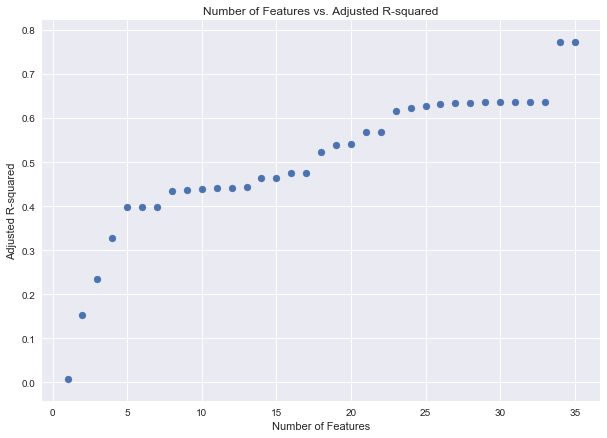

In [180]:
# For bottom 95%
RFEplot(X_train_95, y_train_95)

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out

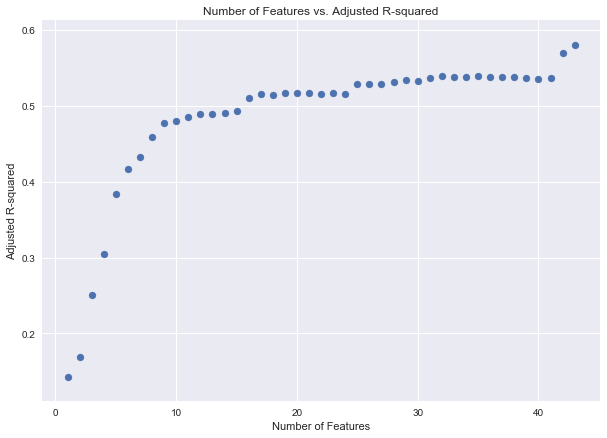

In [181]:
# For top 5%
RFEplot(X_train_t5, y_train_t5)

For both it seems that we need as many of the features as possible to get a sufficiently high enough R^2 value. Let's just choose some arbitrary limit on features and see.

## Get predictions

- Most accurate, least complexity: zip tiers model 1
- Most accurate, most complex: interactions model 2 [highest R^2, and lowest RMSE]

#### Model 1:

In [190]:
model1, X_train_95, y_train_95 = pickle.load(open("model_1zipt_95.pkl", 'rb'))
results = model1.fit(X_train_95, y_train_95)

# Create table with coefficients
coeffdf = pd.DataFrame(data=model1.coef_.reshape(1,-1), columns= X_train_95.columns).transpose()
coeffdf = coeffdf.rename(columns = {0: "Coefficient"})
coeffdf = coeffdf.reset_index()
coeffdf = coeffdf.rename(columns = {'index': "Feature"})
coeffdf['Coefficient'] = coeffdf['Coefficient'].map(lambda x : int(x))
# Sort by values and print top 5
coeffdf.sort_values("Coefficient", axis = 0, ascending = False)

,Feature,Coefficient
1,zip_tier_1,390424
3,zip_tier_2,321318
2,zip_tier_3,286244
4,zip_tier_4,260947
11,waterfront,234625
10,condition_5,188572
6,zip_tier_5,176229
25,condition_4,153511
26,condition_3,146806
8,zip_tier_6,129717


Being on the waterfront is worth 234K, tier 1 comparison +70K more than tier 2 but a whole 2X more than tier 5. price per sqft increase is 153 --> 2000sqft house is worth 153k more +1000sqft

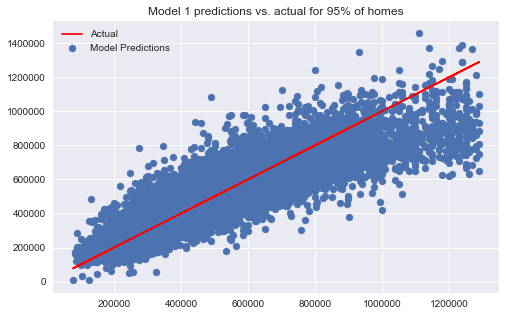

In [194]:
y_pred_95 = model1.predict(X_train_95)

# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_train_95, y_pred_95, label='Model Predictions')
plt.plot(y_train_95, y_train_95, label='Actual', color='r')
plt.title('Model 1 predictions vs. actual for 95% of homes')
plt.legend()
plt.show()

In [193]:
model1_t5, X_train_t5, y_train_t5 = pickle.load(open("model_1zipt_t5.pkl", 'rb'))
results = model1_t5.fit(X_train_t5, y_train_t5)

# Create table with coefficients
coeffdf_t5 = pd.DataFrame(data=model1_t5.coef_.reshape(1,-1), columns= X_train_t5.columns).transpose()
coeffdf_t5 = coeffdf_t5.rename(columns = {0: "Coefficient"})
coeffdf_t5 = coeffdf_t5.reset_index()
coeffdf_t5 = coeffdf_t5.rename(columns = {'index': "Feature"})
coeffdf_t5['Coefficient'] = coeffdf_t5['Coefficient'].map(lambda x : int(x))
# Sort by values and print top 5
coeffdf_t5.sort_values("Coefficient", axis = 0, ascending = False)

,Feature,Coefficient
5,bathrooms_8,1339823
3,grade_13,696456
1,waterfront,636515
6,bathrooms_6,461800
2,zip_tier_2,391480
8,zip_tier_3,190585
7,view,50301
0,sqft_living,270
4,sqft_lot,-1


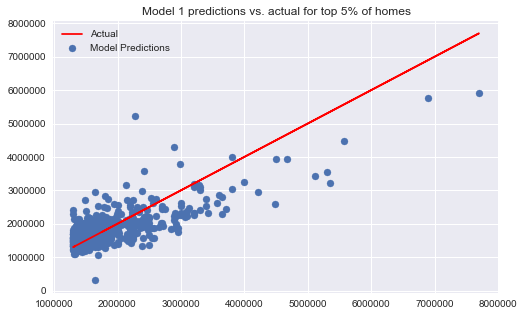

In [195]:
y_pred_t5 = model1_t5.predict(X_train_t5)

# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_train_t5, y_pred_t5, label='Model Predictions')
plt.plot(y_train_t5, y_train_t5, label='Actual', color='r')
plt.title('Model 1 predictions vs. actual for top 5% of homes')
plt.legend()
plt.show()

#### Model 2:

In [197]:
model2, X_train_95, y_train_95 = pickle.load(open("model_2inter_95.pkl", 'rb'))
results = model2.fit(X_train_95, y_train_95)

# Create table with coefficients
coeffdf = pd.DataFrame(data=model2.coef_.reshape(1,-1), columns= X_train_95.columns).transpose()
coeffdf = coeffdf.rename(columns = {0: "Coefficient"})
coeffdf = coeffdf.reset_index()
coeffdf = coeffdf.rename(columns = {'index': "Feature"})
coeffdf['Coefficient'] = coeffdf['Coefficient'].map(lambda x : int(x))
# Sort by values and print top 5
coeffdf.sort_values("Coefficient", axis = 0, ascending = False)

,Feature,Coefficient
26,waterfront,236816
23,zip_tier_1,224261
36,condition_5,196068
10,condition_4,160646
35,condition_3,145727
7,zip_tier_2,140657
27,condition_2,118073
8,zip_tier_3,109950
39,lat,90893
31,zip_tier_4,80545


## Conclusions

- Location: near the waterfront, in tier 1/2 zipcodes
- Worthwhile house features: sqft_living, grade, bedrooms, renovations since 2000
- When: prep to sell during April-July, starting marketing in earlier March/April

##### Models

- Model 1 (Accuracy = .75) uses zip code tiers: 27 features, decreased RMSE of simple linear regression by 1/3 (70K)
    - suggest the waterfront is worth 234K, 2000 sqft living space is worth 153K more than 1000K, zip code tier 1 70k more than zip code tier 2 but at least double what a house in zip code tier 5 would cost
    
- Model 2 (Accuracy = 0.79) accounts for interactions: higher R^2 adjust, lowest RMSE of group
    - suggest you will start losing money if you sell in a tier 5 zipcode, 0 importance to look at lot size, just livable space, renovations add about 60k to what the house is worth, zip tier 1 is worth double of tier 3
    
- RFE good calibrating model when you have many features, but no better performance than model 1 or 2

### FUTURE WORK

- consider industries in the region and how that might increase housing value
- compare against broader region base (how does climate and presence of other land features (mountains etc. affect how valuable certain housing features are)
